# Lending Club Case Study

The analysis is divided into four parts:
1. Data understanding 
2. Data cleaning
3. Data Analysis 
4. Recommendations

## 1. Data Preparation

In [122]:
#setting the current working directory
%pwd

'C:\\Users\\spanbuch\\Desktop\\Abhishek Kaushik\\Data\\loan'

In [123]:
#changing to working folder
%cd .\\Data\loan

[WinError 3] The system cannot find the path specified: '.\\\\Data\\loan'
C:\Users\spanbuch\Desktop\Abhishek Kaushik\Data\loan


In [124]:
##import important library
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

#set the display format to show 20 decimal places with 2 degree of precision
pd.options.display.float_format = '{:20.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [125]:
#importing the file. This file has issues with mixed type. have kept low_memory = False
df=pd.read_csv('loan.csv',low_memory=False)
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [126]:
#shape of data frame
df.shape

(39717, 111)

## 2. Data Cleaning

In [127]:
# Get the percentage of NA values in data
result=(df.isna().sum()/len(df))*100
#Columns which have more than 0% missing values
result[ result > 0 ]

emp_title                                        6.19
emp_length                                       2.71
desc                                            32.58
title                                            0.03
mths_since_last_delinq                          64.66
mths_since_last_record                          92.99
revol_util                                       0.13
last_pymnt_d                                     0.18
next_pymnt_d                                    97.13
last_credit_pull_d                               0.01
collections_12_mths_ex_med                       0.14
mths_since_last_major_derog                    100.00
annual_inc_joint                               100.00
dti_joint                                      100.00
verification_status_joint                      100.00
tot_coll_amt                                   100.00
tot_cur_bal                                    100.00
open_acc_6m                                    100.00
open_il_6m                  

In [128]:
#identify the set of columns to be dropped. Any record with more than 60% NA. We are dropping it upfront
columns_to_drop=set(result[result>60].to_frame().reset_index()['index'])
df.drop(columns_to_drop,inplace=True, axis=1)

In [129]:
#Getting columns with very high value of unique values
df.nunique().sort_values(ascending=False).head(15)

id                 39717
member_id          39717
url                39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
desc               26527
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
dtype: int64

In [130]:
#member_id: this column will not be used for any meaningful analysis as it is unique as id. it has lot of unique values
#url: this column will not be used as it is url of system. it has lot of unique values
#desc: we can use this column if we are planning to use description. As purpose covers part of this we can drop this column
#zip_code: since last 3 digts of zip are blanked out we can eliminate this column
#application_type: this column is for individual loans we can easily drop this column
#title: we are not using this column for further analysis or text prediction for now so dropping. Also it has too many unique values
#emp_title: removing this as title is not useful. it has lot of unique values
#id: removing id as it does not add any value
#below are the amounts ideally which gets populated specific for loan after it is scanctioned we need to drop these 
#as these cannpt be used for determining eligibility and are related post loan issue ignoring those
#    total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
#    out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,last_credit_pull_d,revol_bal,delinq_2yrs

df.drop(['id','title','emp_title','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d',
         'last_pymnt_amnt','delinq_2yrs','out_prncp','revol_bal','out_prncp_inv','total_pymnt','total_pymnt_inv','member_id','url','desc','zip_code','application_type','last_credit_pull_d'],
       inplace=True,
       axis=1)


In [131]:
#identifying columns where range of values are 1. These columns are not ideal for any computation
#if we see the values are either NAN or 0.0. These cannot be filled with 0 or mode/median/mean. 
#they will be better be dropped as they are not useful

#get number of unique values in column
result=df.nunique()
#if number of unique value is 1 no point in analyzing
columns_to_drop=set(result[result==1].to_frame().reset_index()['index'])
#dropping unwanted columns
df.drop(columns_to_drop, inplace=True, axis=1)

In [132]:
# Get the percentage of NA values in data
result=(df.isna().sum()/len(df))*100
#Columns which have more than 0% missing values
result[ result > 0 ]

emp_length                             2.71
revol_util                             0.13
pub_rec_bankruptcies                   1.75
dtype: float64

In [133]:
#since our analysis is for identifying the factors influencing default of loan. 
#Let us remove records whoose loan is currently under process
print(df.loan_status.unique())
#dropping non current records
df = df[df.loan_status!='Current']

['Fully Paid' 'Charged Off' 'Current']


In [134]:
# Get the percentage of NA values in data
result=(df.isna().sum()/len(df))*100
#Columns which have more than 0% missing values
result[ result > 0 ]

emp_length                             2.68
revol_util                             0.13
pub_rec_bankruptcies                   1.81
dtype: float64

In [135]:
#getting the percentage value for each. Looks 0.00 is most occuring value and should be median
df.pub_rec_bankruptcies.value_counts(1)

0.00                   0.96
1.00                   0.04
2.00                   0.00
Name: pub_rec_bankruptcies, dtype: float64

In [136]:
#since 95%data for this column is 0. we fill na with 0 
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.median(),inplace=True)

In [137]:
# since we have less percentage of na data in revol_util field we can safely drop it
df.dropna(axis=0, subset=["revol_util","emp_length"], inplace=True)

In [138]:
df[['loan_amnt','funded_amnt','funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.00,0.98,0.94
funded_amnt,0.98,1.00,0.96
funded_amnt_inv,0.94,0.96,1.00


In [139]:
#since the amounts are having very high coorelation so dropping extra columns from further analysis
df.drop(axis=1,columns=['funded_amnt','funded_amnt_inv'],inplace=True)

In [140]:
#seeing thge top 5 records and standardizing formats
df[["int_rate","revol_util","term"]].head(5)

,int_rate,revol_util,term
0,10.65%,83.70%,36 months
1,15.27%,9.40%,60 months
2,15.96%,98.50%,36 months
3,13.49%,21%,36 months
5,7.90%,28.30%,36 months


In [141]:
#remove the percentage sign in int_rate and revol_util
df["int_rate"] = df.int_rate.apply(lambda x: float(x.split('%')[0]))
df["revol_util"] = df.revol_util.apply(lambda x: float(str(x).split('%')[0]))
# remove months from term and make it numeric
df["term"] = df.term.apply(lambda x: int(x.split()[0]))


In [142]:
# Get the percentage of NA values in data
result=(df.isna().sum()/len(df))*100
#Columns which have more than 0% missing values
result[ result > 0 ]

#now data is not having any dirty data

Series([], dtype: float64)

In [143]:
#converting the earliest_cr_line & issue_d to datetime type
df.earliest_cr_line  = df.earliest_cr_line.apply(lambda x: datetime.strptime(x,'%b-%y'))
df.issue_d  = df.issue_d.apply(lambda x: datetime.strptime(x,'%b-%y'))

In [144]:
#getting type of data stored in emp_length
df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [145]:
# converting emp_lengths as integer 0 for <1 and 10 as 10+
df["emp_length"] = df["emp_length"].apply(lambda x: 0 if "<" in x else (int(x.split("+")[0]) if "+" in x else int(x.split()[0])))

In [146]:
## Outliers Elimination
#getting stats of numeric columns
df[['loan_amnt','installment','annual_inc','dti','open_acc','pub_rec','total_acc']].describe()

,loan_amnt,installment,annual_inc,dti,open_acc,pub_rec,total_acc
count,37497.00,37497.00,37497.00,37497.00,37497.00,37497.00,37497.00
mean,11127.36,324.86,69436.53,13.29,9.30,0.05,22.10
std,7353.97,208.91,64672.08,6.66,4.39,0.23,11.41
min,500.00,15.69,4000.00,0.00,2.00,0.00,2.00
25%,5500.00,167.53,41000.00,8.16,6.00,0.00,13.00
50%,10000.00,280.26,60000.00,13.39,9.00,0.00,20.00
75%,15000.00,429.35,83000.00,18.55,12.00,0.00,29.00
max,35000.00,1305.19,6000000.00,29.99,44.00,4.00,90.00


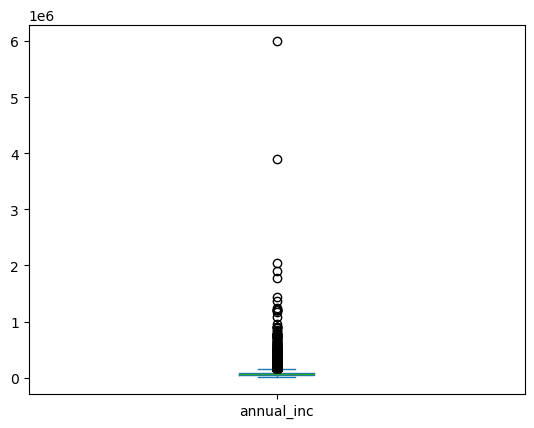

In [147]:
#if we see max annual income is way off for max and 75 percentile we need to remove the outliers
df.annual_inc.plot.box()
plt.show()

In [148]:
#getting 85% percentile which is approx 3 times mean. Somewhare around 1 line
amount = df.annual_inc.quantile(0.85)
amount

100000.0

In [149]:
#removing outliers for annual income
df=df[df.annual_inc<= amount]

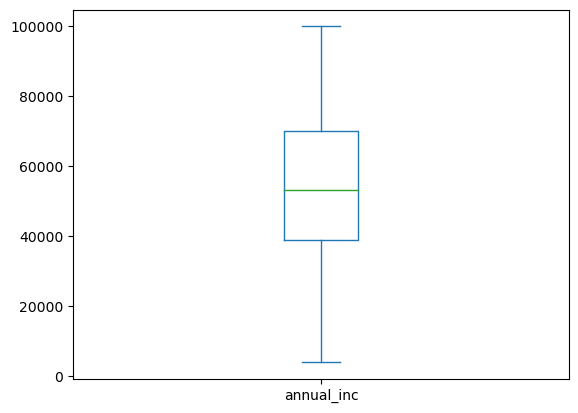

In [150]:
#Now we see that the outliers are removed 
df.annual_inc.plot.box()
plt.show()

In [151]:
#getting basic stats for remaining columns
df[['loan_amnt','installment','annual_inc','dti','open_acc','pub_rec','total_acc']].describe()

,loan_amnt,installment,annual_inc,dti,open_acc,pub_rec,total_acc
count,32067.00,32067.00,32067.00,32067.00,32067.00,32067.00,32067.00
mean,10242.23,299.53,55191.28,13.63,9.01,0.06,20.92
std,6669.86,187.81,21109.06,6.67,4.28,0.24,10.91
min,500.00,15.69,4000.00,0.00,2.00,0.00,2.00
25%,5000.00,160.46,39000.00,8.54,6.00,0.00,13.00
50%,9000.00,261.57,53155.00,13.81,8.00,0.00,19.00
75%,14000.00,393.64,70000.00,18.93,11.00,0.00,27.00
max,35000.00,1302.69,100000.00,29.99,42.00,4.00,87.00


<Axes: >

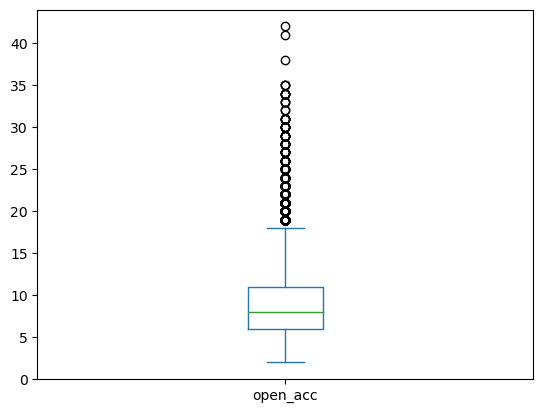

In [152]:
#if we see open_acc is grossly differing for max around 5 time mean and 75% lets remove those outliers
df.open_acc.plot.box()

In [153]:
#lets remove anything above 17-18 from open_acc which is around 95% percentile
tile=df.open_acc.quantile(0.95)
tile

17.0

In [154]:
#removing the outliers for open_acc
df=df[df.open_acc<=tile]

<Axes: >

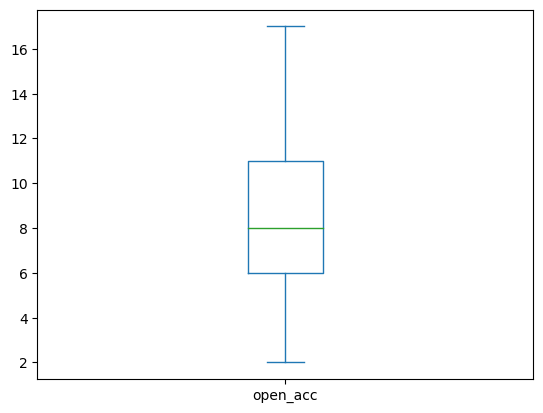

In [155]:
#checking if skew has been removed for open_acc
df.open_acc.plot.box()

In [156]:
#getting basic stats for other columns
df[['loan_amnt','installment','annual_inc','dti','open_acc','pub_rec','total_acc']].describe()

,loan_amnt,installment,annual_inc,dti,open_acc,pub_rec,total_acc
count,30696.00,30696.00,30696.00,30696.00,30696.00,30696.00,30696.00
mean,10181.53,297.65,54805.30,13.48,8.49,0.06,20.06
std,6652.45,186.91,21093.21,6.67,3.53,0.24,10.10
min,500.00,15.69,4000.00,0.00,2.00,0.00,2.00
25%,5000.00,159.23,38500.00,8.38,6.00,0.00,12.00
50%,8800.00,259.63,52800.00,13.64,8.00,0.00,19.00
75%,14000.00,391.45,70000.00,18.74,11.00,0.00,26.00
max,35000.00,1302.69,100000.00,29.99,17.00,4.00,87.00


<Axes: >

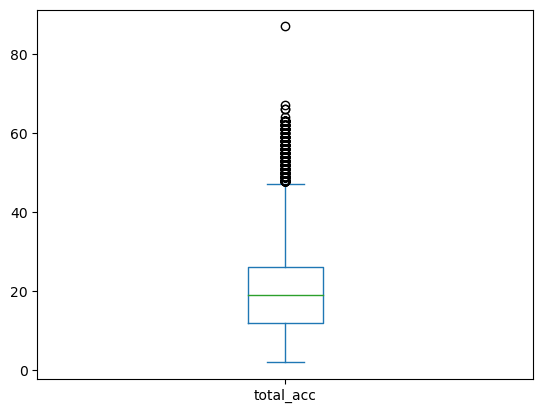

In [157]:
#if we see max value for total account is 4 time mean. lest clean the outliers
df.total_acc.plot.box()

In [158]:
#based on above lets remove the data above 50 which is around 99th percentile
tile=df.total_acc.quantile(0.99)
tile

49.0

In [159]:
#remove outliers from total_acc
df=df[df.total_acc<=tile]

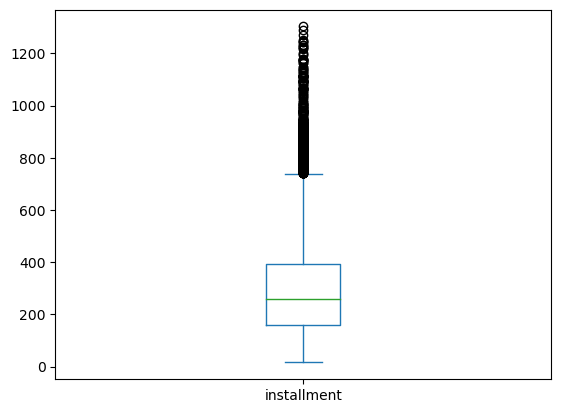

In [160]:
#lets check the plot for installment. Looks we have outliers above 800 which is around 98% percentils
tile=df.installment.plot.box()

In [161]:
#getting 98 quantile value
tile=df.installment.quantile(0.98)
tile

814.0

In [162]:
df=df[df.installment<=tile]

In [163]:
#getting basic stats for other columns
df[['loan_amnt','installment','annual_inc','dti','open_acc','pub_rec','total_acc']].describe()
#looks like other fields are not skewed badly.. retaining these as they do make some businsess sense

,loan_amnt,installment,annual_inc,dti,open_acc,pub_rec,total_acc
count,29806.00,29806.00,29806.00,29806.00,29806.00,29806.00,29806.00
mean,9791.62,285.02,54203.97,13.43,8.43,0.06,19.64
std,6134.44,166.74,20909.33,6.67,3.50,0.24,9.51
min,500.00,15.69,4000.00,0.00,2.00,0.00,2.00
25%,5000.00,157.13,38054.00,8.31,6.00,0.00,12.00
50%,8450.00,254.78,52000.00,13.57,8.00,0.00,18.00
75%,13150.00,381.44,70000.00,18.70,11.00,0.00,26.00
max,35000.00,814.00,100000.00,29.99,17.00,4.00,49.00


In [164]:
#Generating new columns from existing datetime columns
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x: x.year)
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda x: x.month)

df['issue_d_year'] = df['issue_d'].apply(lambda x: x.year)
df['issue_d_month'] = df['issue_d'].apply(lambda x: x.month)


In [165]:
#creating derived column as 1 for Default and 0 for Fully Paid
df["loan_status"] = df["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

In [166]:
#getting values for loan_amnt
df.loan_amnt.describe()

count               29806.00
mean                 9791.62
std                  6134.44
min                   500.00
25%                  5000.00
50%                  8450.00
75%                 13150.00
max                 35000.00
Name: loan_amnt, dtype: float64

In [167]:
#Binning the continous variable for loan_amt into buckets. Approximating to 5k. buckets are intentionally kept as int to aid plotting
bins = [0, 5000, 10000, 15000, 20000, 25000, 125000]
buckets = [0, 5000, 10000, 15000,20000,25000]
df['loan_amnt_range'] = pd.cut(df['loan_amnt'], bins, labels=buckets)

In [168]:
#getting values for int_rate
df.int_rate.describe()

count               29806.00
mean                   11.79
std                     3.57
min                     5.42
25%                     8.90
50%                    11.71
75%                    14.22
max                    24.40
Name: int_rate, dtype: float64

In [169]:
#binning the interest rate continous into buckets. buckets are kept in 3% range ased 
bins = [-1, 3, 6, 9, 12, 15, 18, 21,30]
buckets = [0, 3, 6, 9, 12, 15, 18, 21]
df['int_rate_range'] = pd.cut(df['int_rate'], bins, labels=buckets)

In [170]:
#getting stats of dti
df.dti.describe()

count               29806.00
mean                   13.43
std                     6.67
min                     0.00
25%                     8.31
50%                    13.57
75%                    18.70
max                    29.99
Name: dti, dtype: float64

In [171]:
# create bins for dti range into buckets
bins = [-1, 5, 10, 15, 20, 25, 50.00]
bucket = [0, 5, 10, 15, 20, 25]
df['dti_range'] = pd.cut(df['dti'], bins, labels=bucket)

In [172]:
#getting annual income values
df.annual_inc.describe()

count               29806.00
mean                54203.97
std                 20909.33
min                  4000.00
25%                 38054.00
50%                 52000.00
75%                 70000.00
max                100000.00
Name: annual_inc, dtype: float64

In [173]:
#binning the annual income into buckets
bins = [0, 25000, 50000, 75000, 100000]
buckets = [0, 25000, 50000, 75000]
df['annual_inc_range'] = pd.cut(df['annual_inc'], bins, labels=buckets)

In [174]:
#getting installment stats
df.installment.describe()

count               29806.00
mean                  285.02
std                   166.74
min                    15.69
25%                   157.13
50%                   254.78
75%                   381.44
max                   814.00
Name: installment, dtype: float64

In [175]:
#binning the installment into buckets
bins = [0, 150, 300, 450, 600, 2000]
buckets = [0, 150, 300, 450,600]
df['installment_range'] = pd.cut(df['installment'], bins, labels=buckets)

In [176]:
#getting revol_util stats
df.revol_util.describe()

count               29806.00
mean                   48.95
std                    28.25
min                     0.00
25%                    25.70
50%                    49.40
75%                    72.20
max                    99.90
Name: revol_util, dtype: float64

In [177]:
#binning the installment into buckets
bins = [-1, 20, 40, 60, 80, 100]
buckets = [0, 20, 40, 60, 80]
df['revol_util_range'] = pd.cut(df['revol_util'], bins, labels=buckets)

## 3. Data Analysis

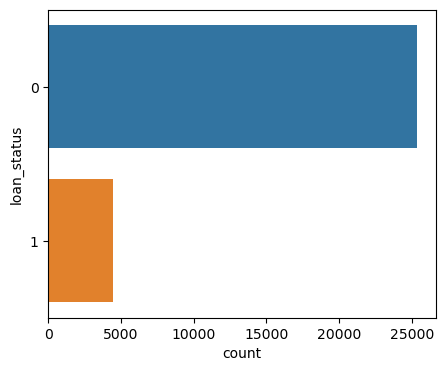

In [178]:
# check for amount of defaults in the data using countplot
plt.figure(figsize=(5,4))
sns.countplot(y="loan_status", data=df)
plt.show()
#from above we can say stat around 1/6 of people default

In [179]:
#this function will genralize plot creation for different 
def plotBarChart(column, figSize):
    #this field stores 1 and 0 for Default and Fully Paid
    dataColumn = 'loan_status'
    #sorting list
    sortOrder=sorted(df[column].unique())
    #getting count per column value irrespective of whether it has defaulted
    d2=df[[column, dataColumn]].groupby(column).count().rename(columns = {dataColumn:'count'}).reset_index()
    #gettin all default for column value
    d3=df[[column, dataColumn]].groupby(column).sum().rename(columns = {dataColumn:'sum'}).reset_index()
    #merging both into single frame which is used to generate %
    dmerged=d2.merge(d3,how='left', left_on=column, right_on=column)
    #generate percentage column = default/total(in that value class)
    dmerged["percentage"]=dmerged['sum']*100/dmerged['count']
    #set the figsize
    plt.figure(figsize=figSize)
    #plot the barchart
    sns.barplot(x=column, y="percentage", data=dmerged, order=sortOrder)
    #set its title
    plt.title(f"Loan Defaults across {column}")
    #set its yaxis label
    plt.ylabel("Defaults(%)")
    #show
    plt.show()
    
#this function will genralize plot creation for different 
def plotBasicSpreadChart(column, figSize):
    #set fig size
    plt.figure(figsize=figSize)
    #Choose 1st plot
    plt.subplot(1,2,1)
    #plot histogram
    sns.histplot(data=df, x=column)
    #choose second plot
    plt.subplot(1,2,2)
    #plot the box plot
    sns.boxplot(data=df[column])
    #set the title
    plt.title(f"Data distribution for {column}")
    plt.show()

#this function will genralize plot creation for different 
def plotBasicHistChart(column, figSize):
    #set figSize
    plt.figure(figsize=figSize)
     #sorting list
    sortOrder=sorted(df[column].unique())
    #Plot
    sns.histplot(data=df, x=column)
    #set title
    plt.title(f"Data distribution for {column}")
    plt.show()    
    
def plotBoxChartChart(column, numeric, figsize=(8,3)):
    plt.figure(figsize=figsize)
    sortedOrder=sorted(df[column].unique())
    sns.boxplot(x=column, y=numeric, data=df,order = sortedOrder)
    plt.title(f"{column} vs {numeric}")
    
    
def plotBarChartAlt(x,cat,figSize):
    #this field stores 1 and 0 for Default and Fully Paid
    dataColumn = 'loan_status'    
    #set the figure size
    plt.figure(figsize=figSize)
    #plot the barchart
    sns.barplot(x=x, y=cat, hue=dataColumn, data=df)
    #set title
    plt.title(f"Plot of {x} for categories {cat}")
    #set x axis label
    plt.xlabel(x)
    #set y axis label
    plt.ylabel(f"{cat}")
    plt.show()    
#http://people.uncw.edu/pricej/teaching/statistics/graphing_choices.htm
def plotLinePlot(x,y,figSize):
    #this field stores 1 and 0 for Default and Fully Paid
    dataColumn = 'loan_status'    
    #set the figure size
    plt.figure(figsize=figSize)
    #plot the barchart
    sns.lineplot(x=x, y=y, hue=dataColumn, data=df)
    #set title
    plt.title(f"Plot of {x} for categories {y}")
    #set x axis label
    plt.xlabel(x)
    #set y axis label
    plt.ylabel(f"{y}")
    plt.show()
def plotScatterPlot(x,y,figSize):
    #this field stores 1 and 0 for Default and Fully Paid
    dataColumn = 'loan_status'    
    #set the figure size
    plt.figure(figsize=figSize)
    #plot the barchart
    sns.jointplot(x=x, y=y, hue=dataColumn, data=df)
    #set title
    plt.title(f"Plot of {x} for categories {y}")
    #set x axis label
    plt.xlabel(x)
    #set y axis label
    plt.ylabel(f"{y}")
    plt.show()        

### Loan Amount

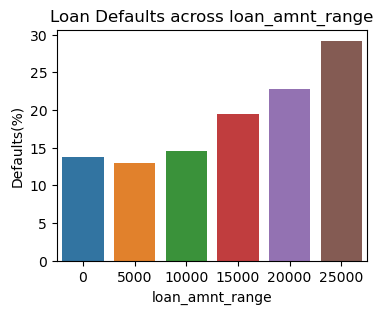

In [180]:
#there is a potential that loan amount has impact. Higher the amount the more likely to default - Yes

plotBarChart('loan_amnt_range',(4,3))

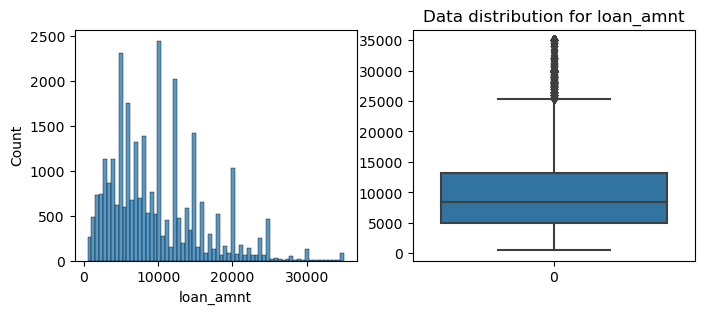

In [181]:
plotBasicSpreadChart('loan_amnt',(8,3))

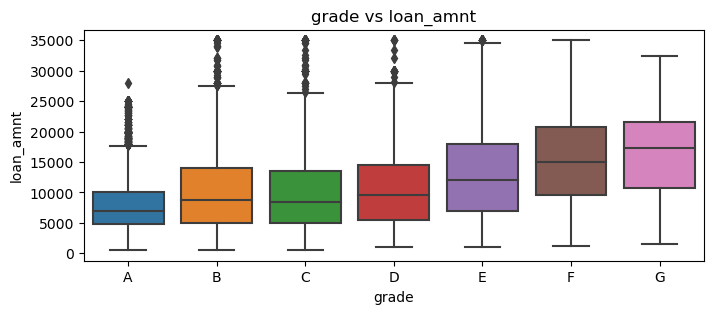

In [182]:
plotBoxChartChart('grade','loan_amnt')

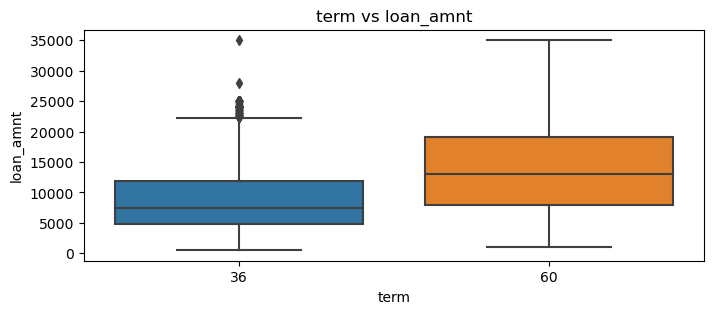

In [183]:
plotBoxChartChart('term','loan_amnt')

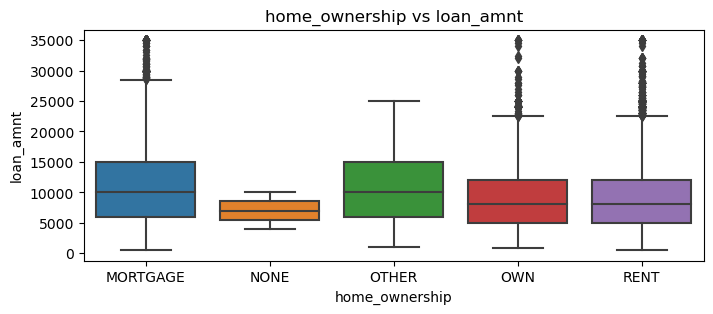

In [184]:
plotBoxChartChart('home_ownership','loan_amnt')

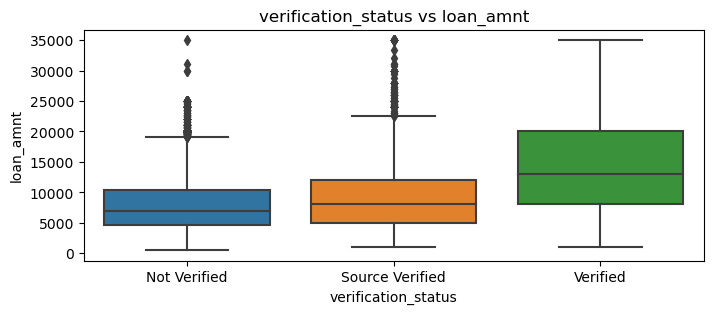

In [185]:
plotBoxChartChart('verification_status','loan_amnt')

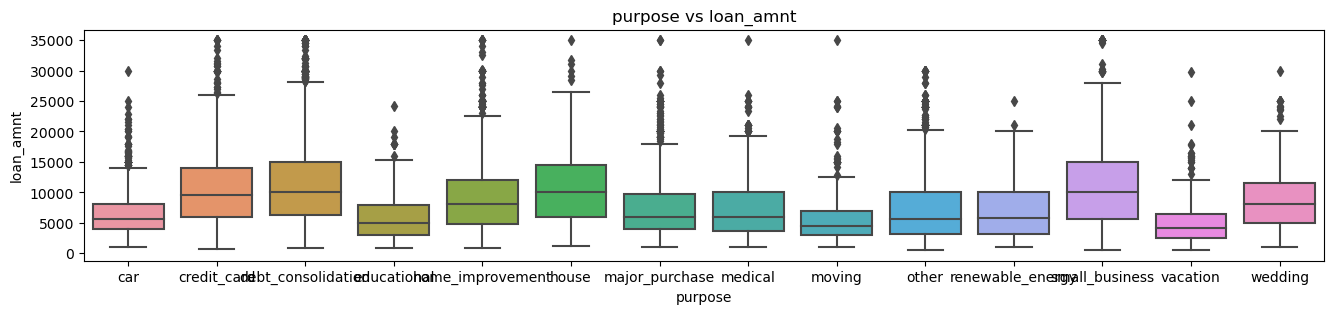

In [186]:
plotBoxChartChart('purpose','loan_amnt',(16,3))

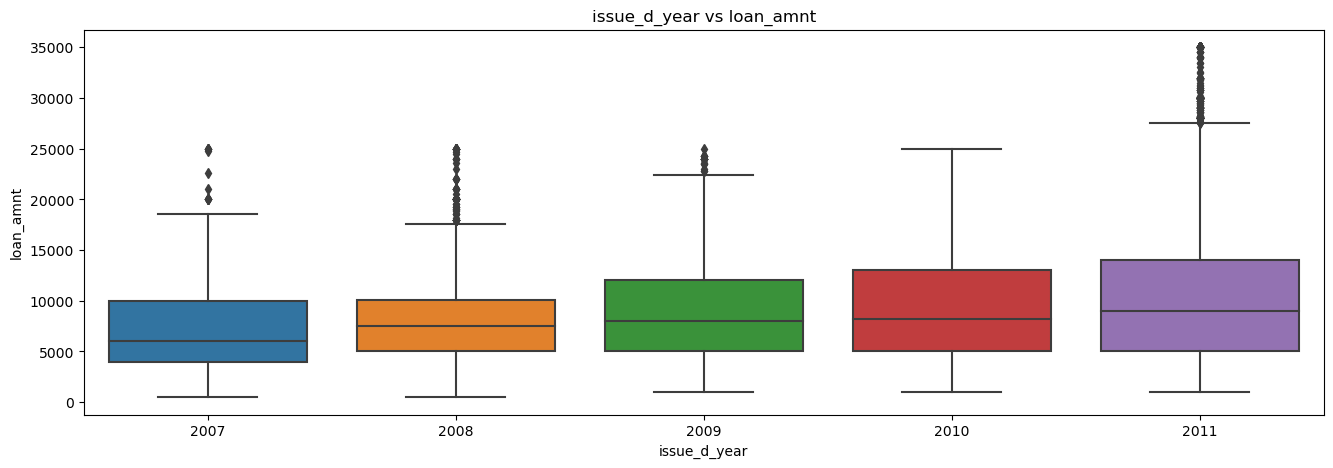

In [187]:
plotBoxChartChart('issue_d_year','loan_amnt',(16,5))

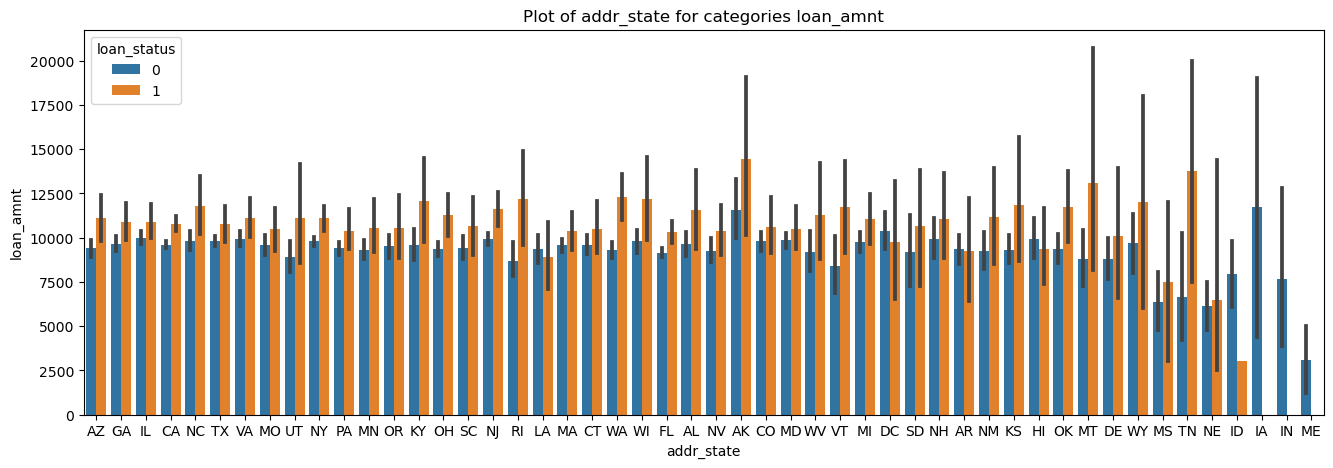

In [188]:
plotBarChartAlt('addr_state','loan_amnt',(16,5))

<Figure size 800x500 with 0 Axes>

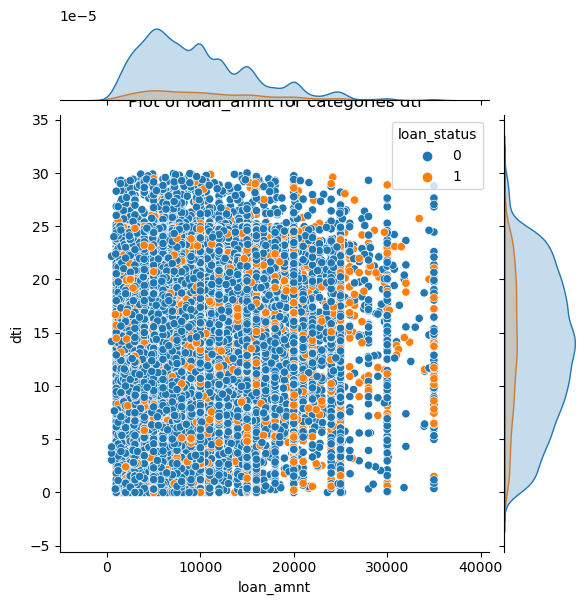

In [189]:
plotScatterPlot('loan_amnt','dti', (8,5))

<Figure size 800x500 with 0 Axes>

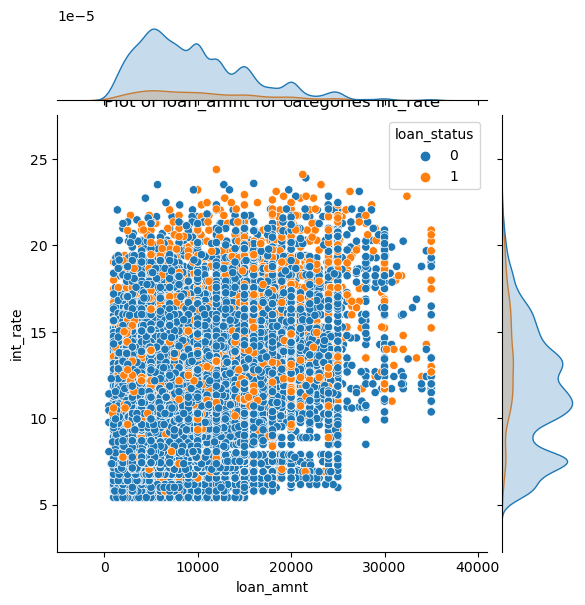

In [190]:
plotScatterPlot('loan_amnt','int_rate', (8,5))

<Figure size 800x500 with 0 Axes>

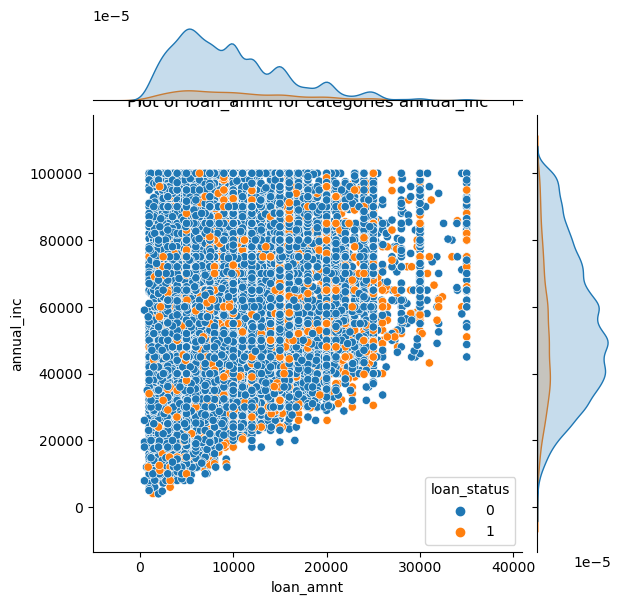

In [191]:
plotScatterPlot('loan_amnt','annual_inc', (8,5))

#### Observation
From the above plots we can say that people tend to take loans in range of 8k. We do see a tendency of people to default if loans are above 15k. 

From above it is evident that loan amount is more for lower grade and higher tenure.

Looks verified loan owners are getting more loan compared to others.

Looks more loan is granted to small business and debt consolidation

Looks loans disbursement has increased significantly from 2009. This is likely year we had a recession starting

there is no corelation between interest rate/dti/annual_inc and loan amount

### Term

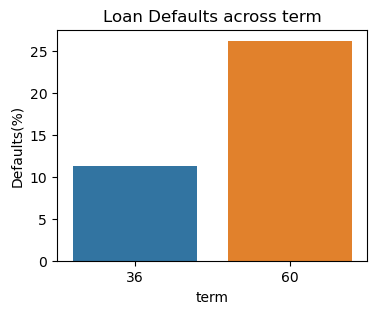

In [192]:
#if we plot based on term we see that more tenure of loan the more chances of default - Yes
plotBarChart("term",(4,3))

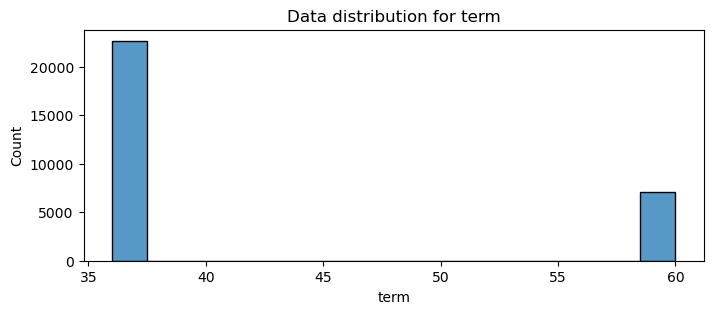

In [193]:
plotBasicHistChart('term',(8,3))

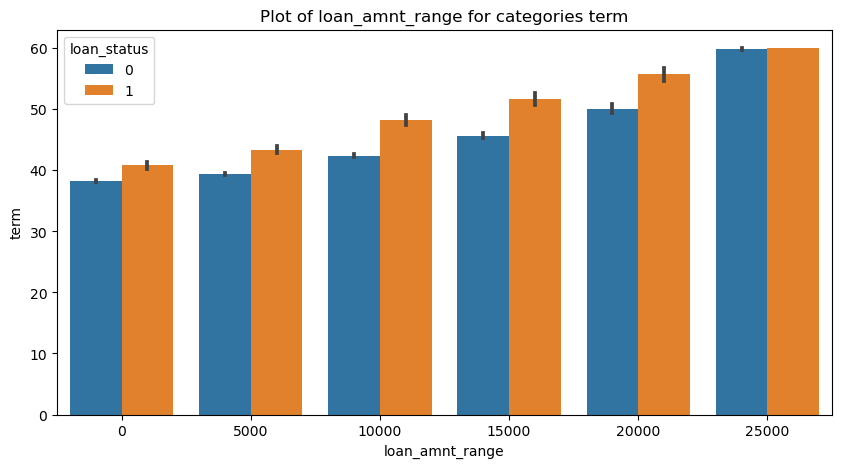

In [194]:
plotBarChartAlt('loan_amnt_range','term',(10,5))

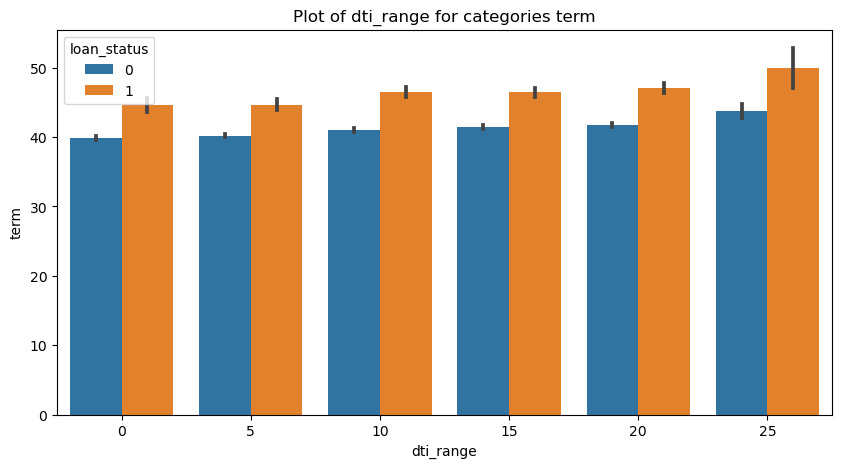

In [195]:
plotBarChartAlt('dti_range','term',(10,5))

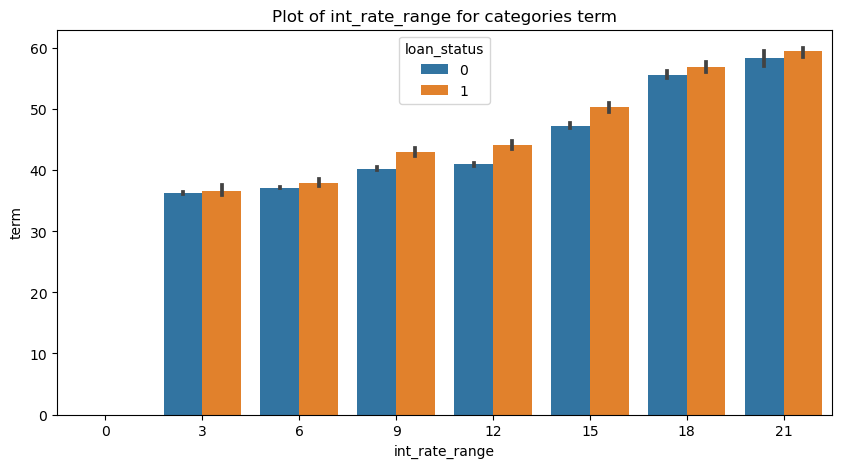

In [196]:
plotBarChartAlt('int_rate_range','term',(10,5))

#### Observation
From the above plots we can say that are taking 36 months loans(second). Ratio of defaults is more for 60 months loan which is evident from first chart. 

loan amount is not related to term for defaults

higher interest rates the deafult rate is higher in both 36 and 60 months tenure

dti has slight impact on default rates
 
***This field can be used for granting loans. Shorter are better

### Grade

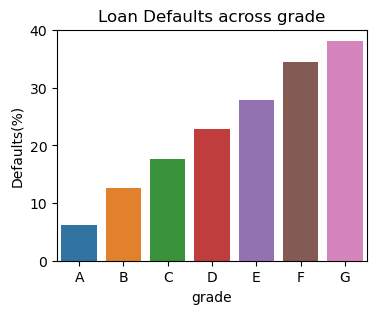

In [197]:
#if we plot based on grades we see that more tenure of loan the more chances of default -Yes
plotBarChart("grade",(4,3))

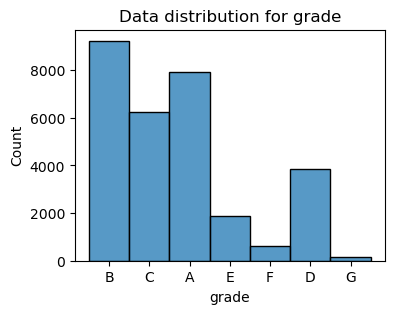

In [198]:
plotBasicHistChart('grade',(4,3))

#### Observation
From the above plots as the grade lowers the chances of default are more. Based on current data most loans are issued for grades upto C
*** Lower the grade chances of default are more

### Employment Length

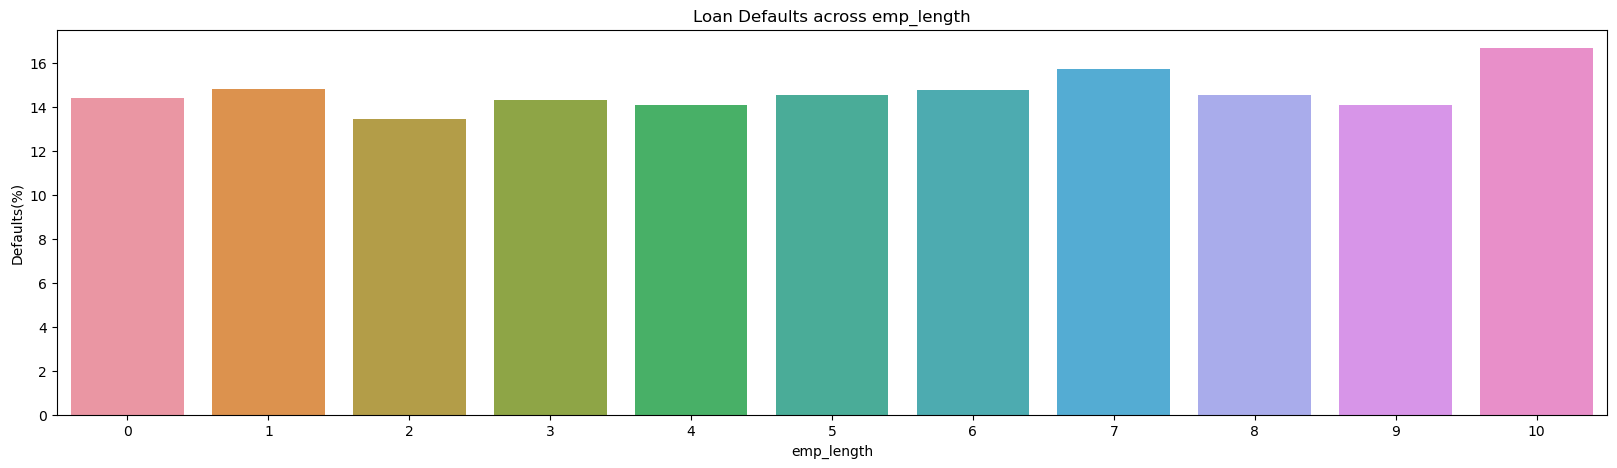

In [199]:
#employment does not have a significant bearing on defaults - No
plotBarChart("emp_length",(20,5))

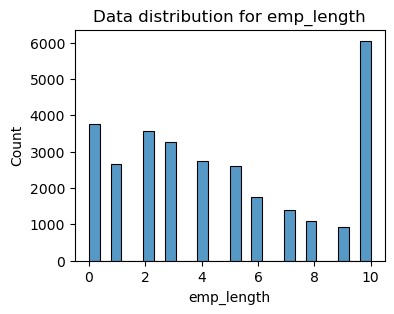

In [200]:
plotBasicHistChart('emp_length',(4,3))

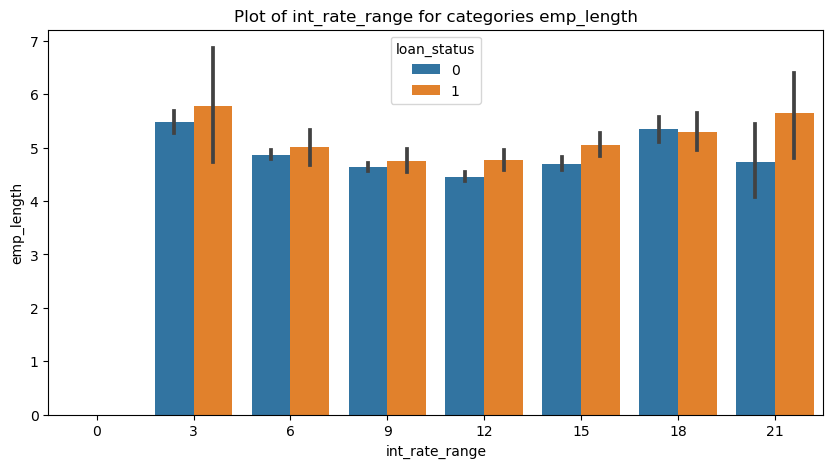

In [201]:
plotBarChartAlt('int_rate_range','emp_length',(10,5))

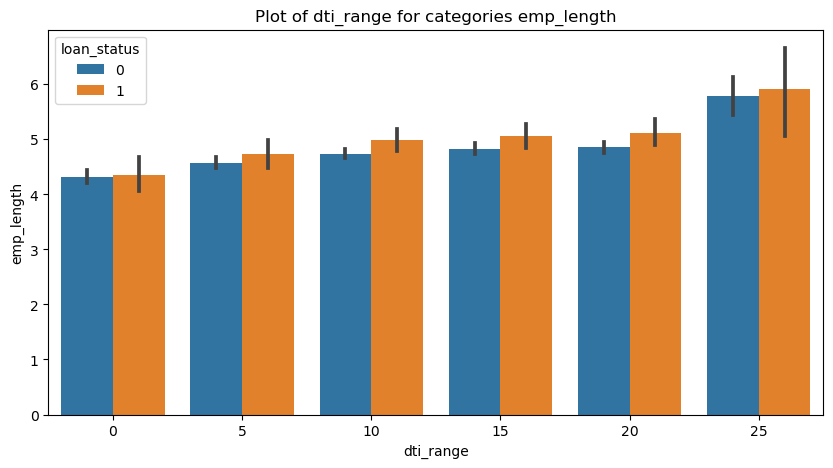

In [202]:
plotBarChartAlt('dti_range','emp_length',(10,5))

#### Observation
From the above we can say 10+ years of experience are more favoured for loan. From first chart it seems employment length has less impact on defaults

looks interest rate & dti does not have impact on defaults



### Home Ownership

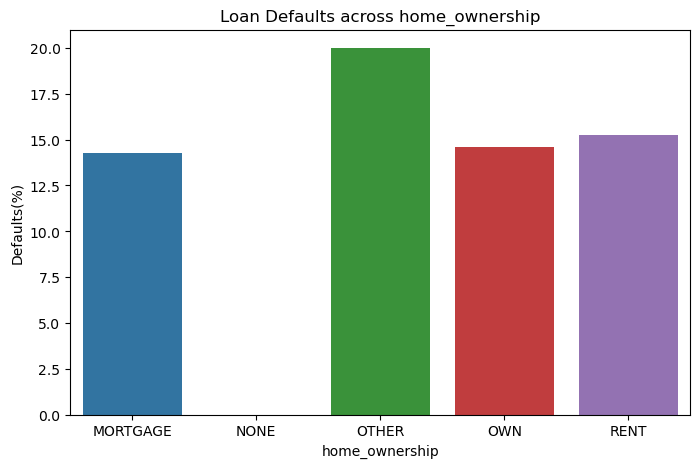

In [203]:
#home ownership does not have a significant bearing on defaults -No
plotBarChart("home_ownership",(8,5))

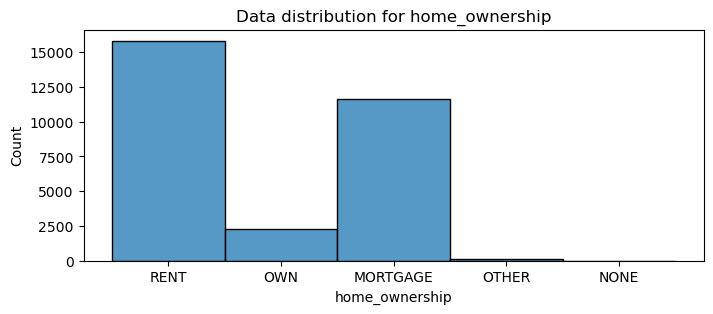

In [204]:
plotBasicHistChart('home_ownership',(8,3))

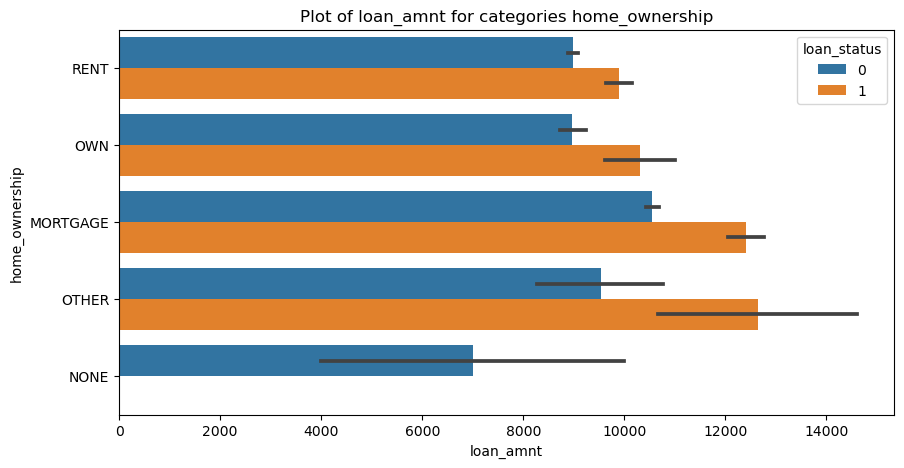

In [205]:
plotBarChartAlt('loan_amnt','home_ownership',(10,5))

#### Observation
From the above plots we can say that people who are on rental or have some kind of dues are more likely to go for loan. There is no clear indication that owners defaults less than those who rent

looks others and mortguage are taking more loans with higer default number(not %)


### Annual Income

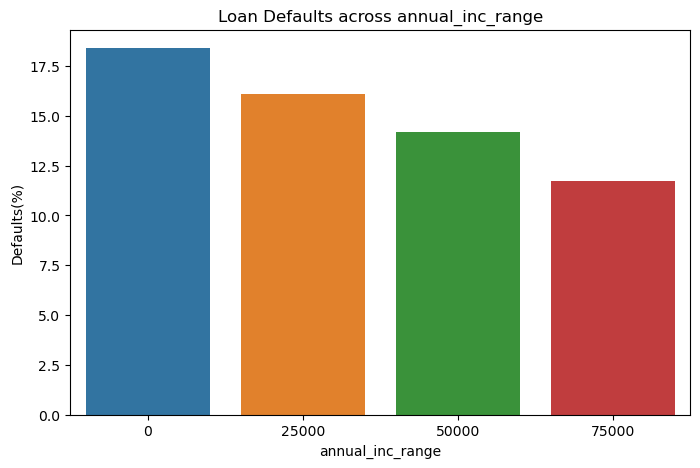

In [206]:
#As observed lower annual income the higher chance of default. Thus lowe annual income has bearing on defaults -- Yes.
plotBarChart("annual_inc_range",(8,5))

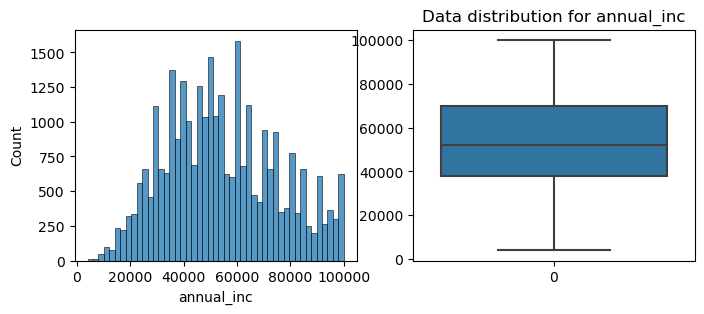

In [207]:
plotBasicSpreadChart('annual_inc',(8,3))

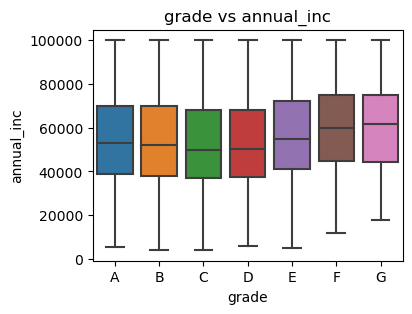

In [208]:
plotBoxChartChart('grade','annual_inc',(4,3))

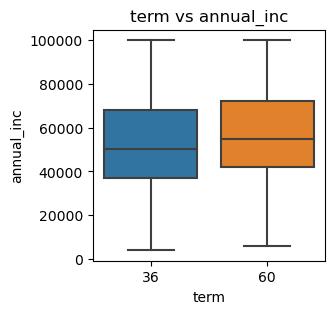

In [209]:
plotBoxChartChart('term','annual_inc',(3,3))

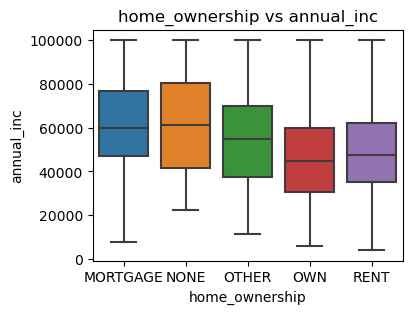

In [210]:
plotBoxChartChart('home_ownership','annual_inc',(4,3))

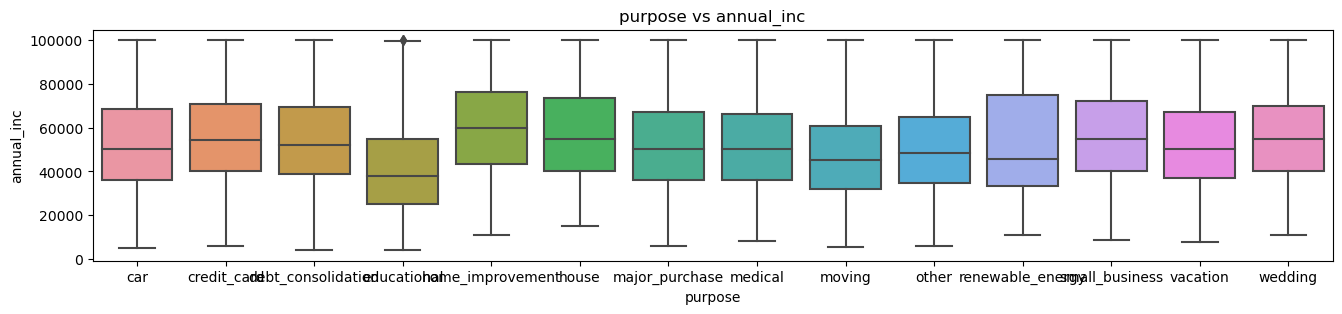

In [211]:
plotBoxChartChart('purpose','annual_inc',(16,3))

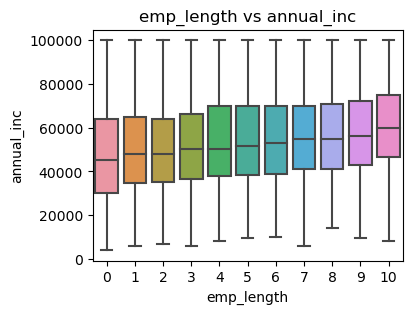

In [212]:
plotBoxChartChart('emp_length','annual_inc',(4,3))

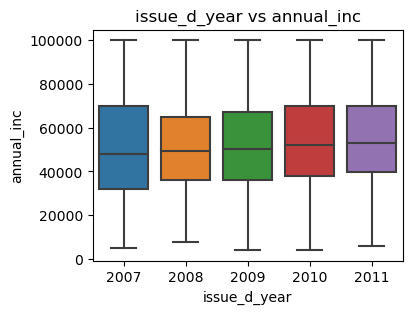

In [213]:
plotBoxChartChart('issue_d_year','annual_inc',(4,3))

#### Observation
From the above plots we can say that people have a median income of around 50k. It seems that as income increases likelyhood of default also decreases

Looks annual income does not have significant impact on grade or term of loan

None and Mortgage type user seems to have more annual income

Renewable energy, small business and home improvements have higher annual income mentioned for the loan request.

Seems higher the tenure more likely he has more income

There is no coorelation on annual income and issued year


### Purpose

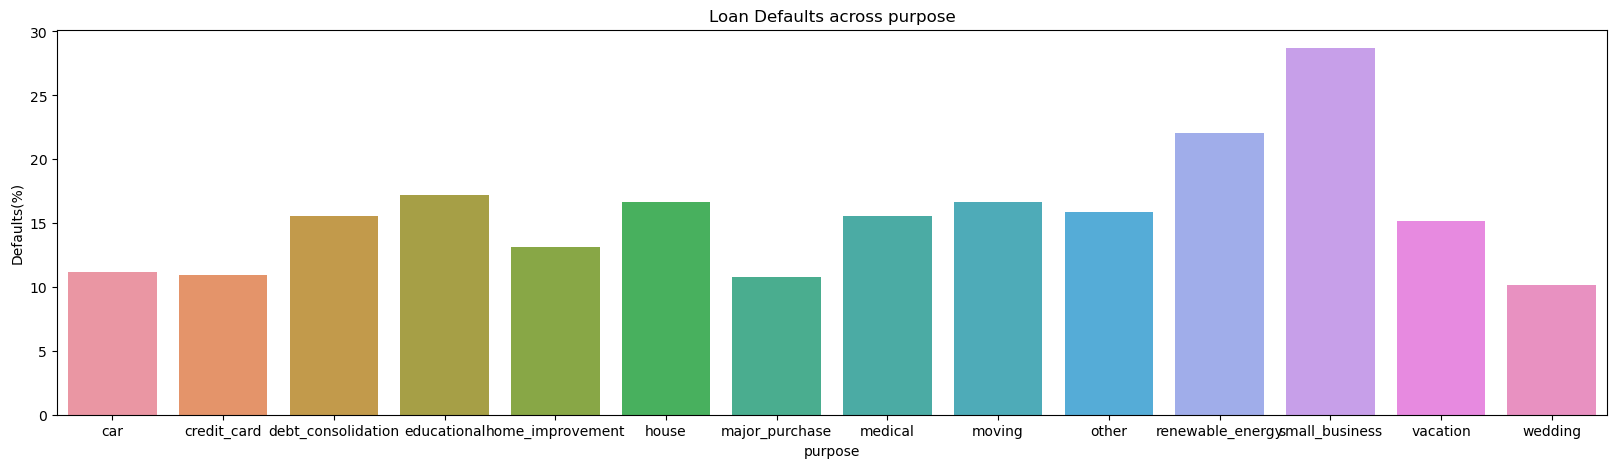

In [214]:
#purpose does have a bearing if the purpose belongs to small business. Differing by 10 points - Yes(Maybe-Watchout)
plotBarChart("purpose",(20,5))

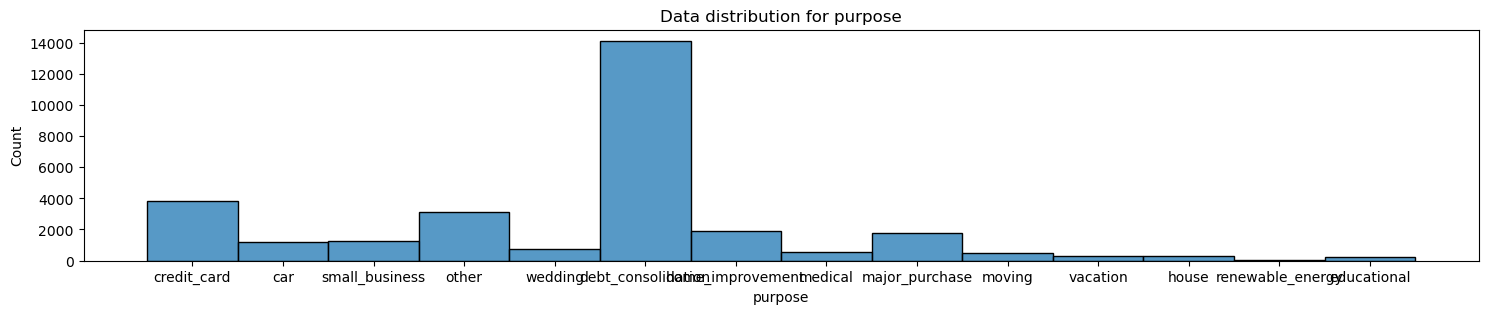

In [215]:
plotBasicHistChart('purpose',(18,3))

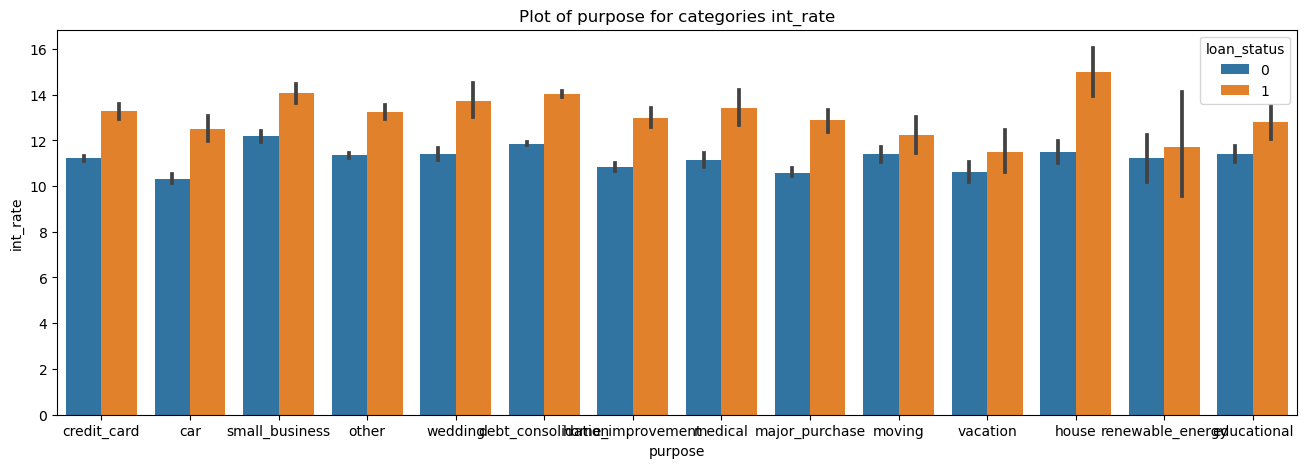

In [216]:
plotBarChartAlt('purpose','int_rate',(16,5))

#### Observation
From the above plots we can say that debt consolidation is the major contributor for loans. Also it appears that renewable and small business are more likely to default. In terms of numbers debt consolidation adds to meat

thereis no significant relation between purpose and interest rate

### Public Recorded Bankruptcies

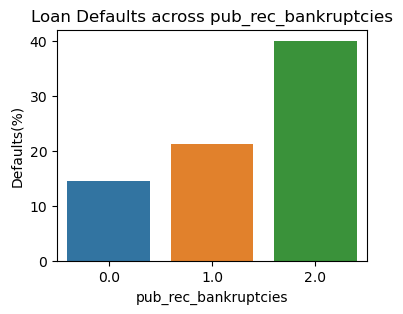

In [217]:
# this field has impact on the default rate. The more default he is more likely to default
plotBarChart('pub_rec_bankruptcies',(4,3))

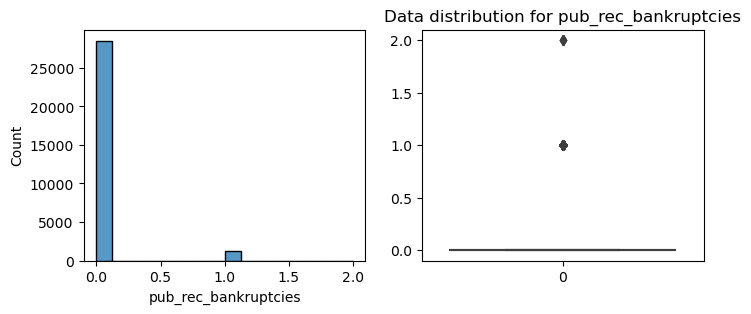

In [218]:
plotBasicSpreadChart('pub_rec_bankruptcies',(8,3))

#### Observation
From data it appears that if there are public bankrupcies likelyhood of default again is very high. Also most of data is not having public bankrupcy


### Total Accounts

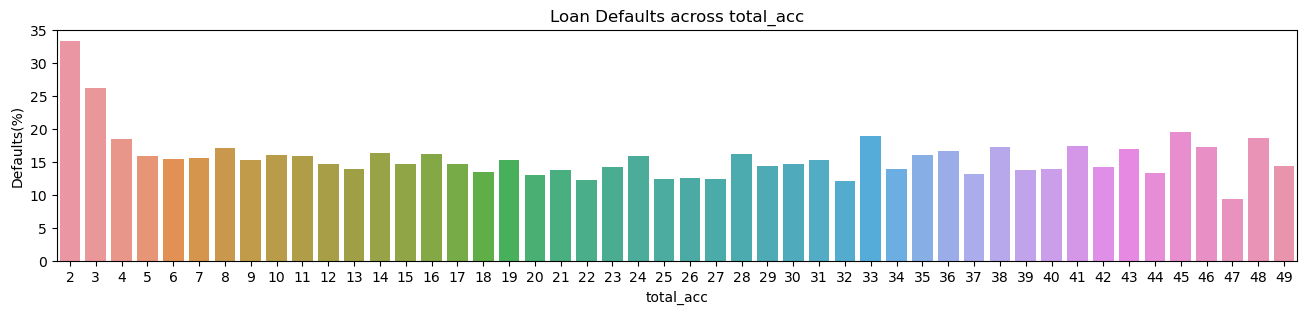

In [219]:
#this field is more or less even it does not have significant influence unless they are having 2-3 open accounts -Yes(Maybe- Watchout)
plotBarChart('total_acc',(16,3))

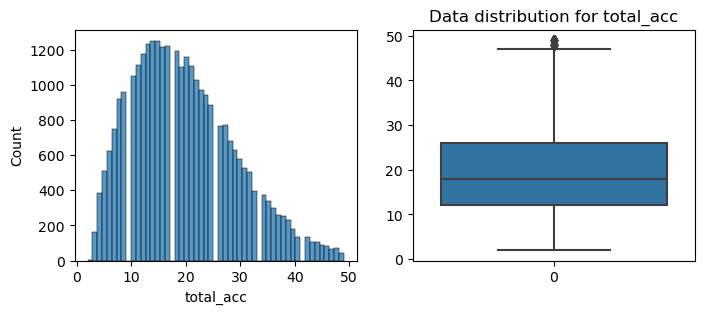

In [220]:
plotBasicSpreadChart('total_acc',(8,3))

#### Observation
From the above plots we can say that person having 2-3 accounts is likely to default more than others. Most of the people have around 10-30 accounts

### Public Records

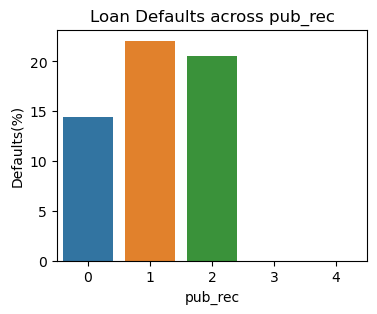

In [221]:
#this field does seem to have a major impact if values are in range(1 and 2) - Yes
plotBarChart('pub_rec',(4,3))

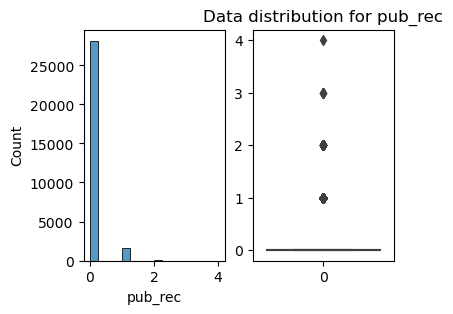

In [222]:
plotBasicSpreadChart('pub_rec',(4,3))

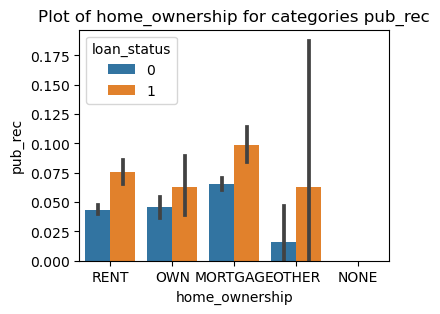

In [223]:
plotBarChartAlt('home_ownership','pub_rec',(4,3))

#### Observation
From the above plots we can say that person who writes publically has more chances for default. Most people avoid writing publically

Looks like mortgauge users are more likely to have public users



### Open Accounts

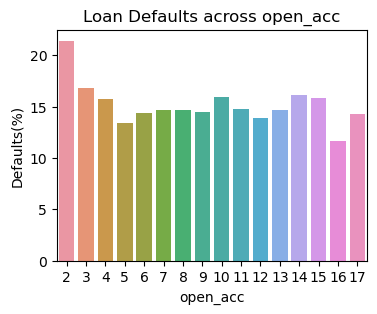

In [224]:
#this field does not seem to have any impact. More or less smooth - Yer(Maybe)
plotBarChart('open_acc',(4,3))

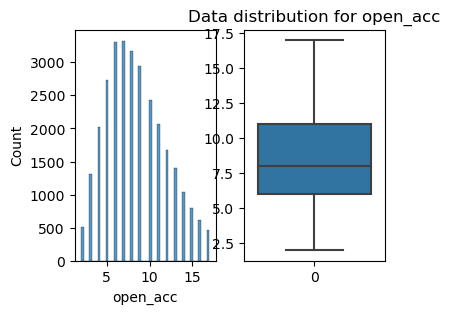

In [225]:
plotBasicSpreadChart('open_acc',(4,3))

#### Observation
From the above data it increases chances for default if no of open accounts are in range 2-3. Most people have 6-11 open accounts

### Inquiries in last 6 months

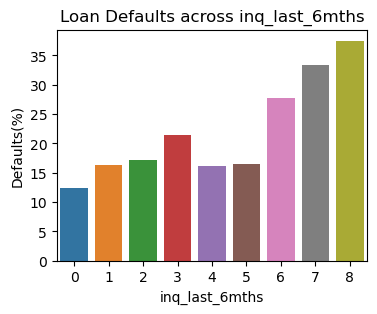

In [226]:
#this field seems to have impact. Looks more than 6 enquires are likely to cause default - yes
plotBarChart('inq_last_6mths',(4,3))

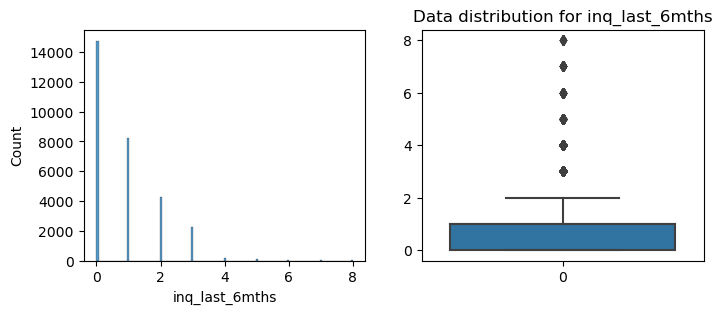

In [227]:
plotBasicSpreadChart('inq_last_6mths',(8,3))

#### Observation
From the above plots we can say that person making more inquiries are likely to default. Most people prefer not to inquire

### State

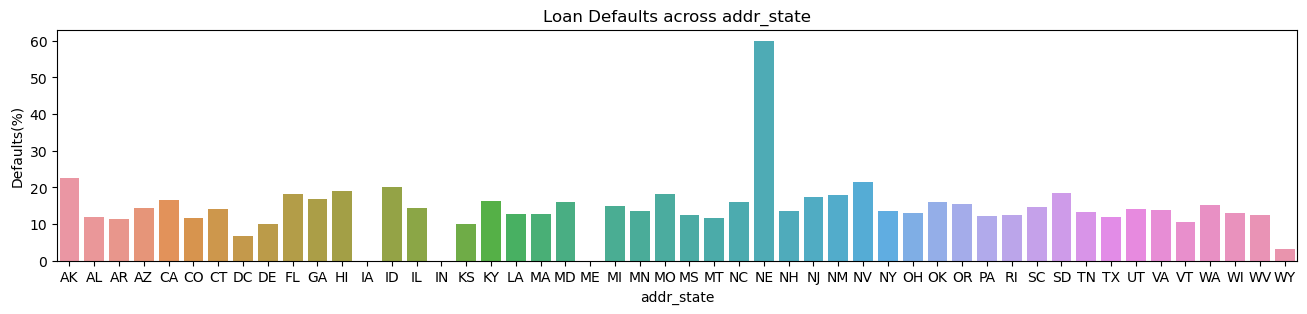

In [228]:
#NE state seems to be leading in defaults-Yes
plotBarChart('addr_state',(16,3))

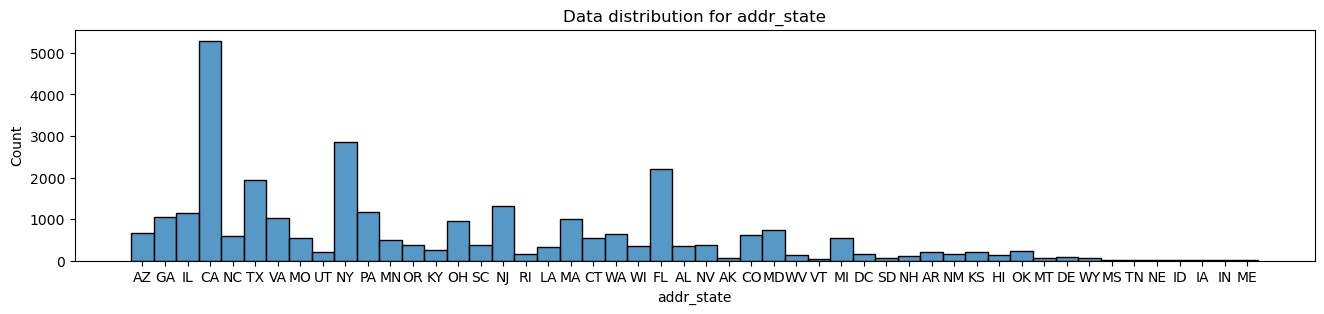

In [229]:
plotBasicHistChart('addr_state',(16,3))

#### Observation
From the above plots we can say that 60% of NE residents default. In terms of volume residents of CA lead the pack

### Verification Status

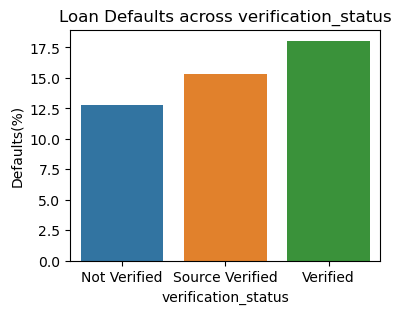

In [230]:
#verification is not having siginificant impact as difference be them is insignificant
plotBarChart('verification_status',(4,3))

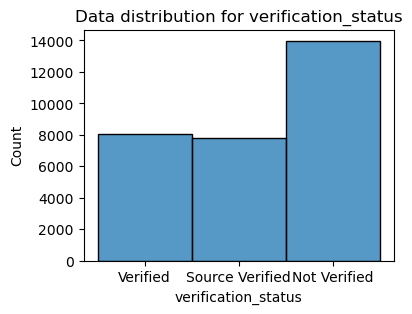

In [231]:
plotBasicHistChart('verification_status',(4,3))

#### Observation
From the above plots we can say that verify people are more likely to default compared to others

### Issue Date

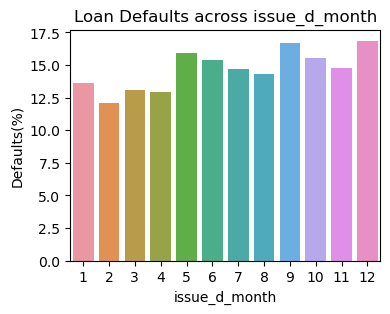

In [232]:
#no relation observed for issue month - No
plotBarChart('issue_d_month',(4,3))

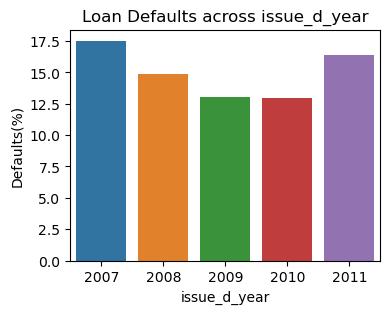

In [233]:
#No relation observed for year
plotBarChart('issue_d_year',(4,3))

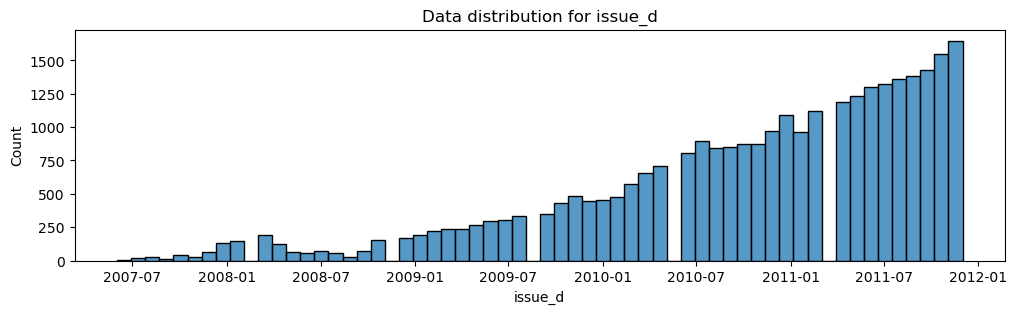

In [234]:
plotBasicHistChart('issue_d',(12,3))

#### Observation
From the above plots we cannot say anything abour default rates.  Off late company has been giving more loans

### Earliest Credit Line

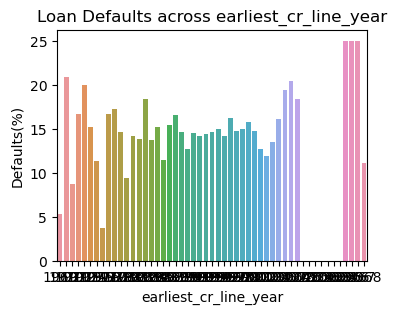

In [235]:
#doesnt seem to have much impact as variance is not significant
plotBarChart('earliest_cr_line_year',(4,3))

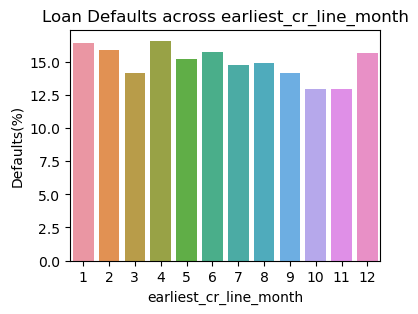

In [236]:
#doesnt seem to have much impact as variance is not significant
plotBarChart('earliest_cr_line_month',(4,3))

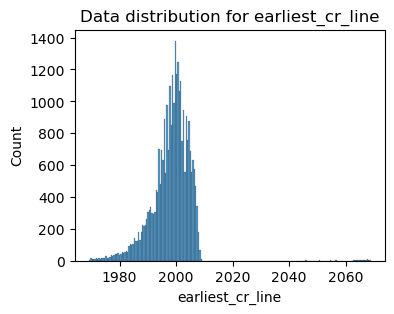

In [237]:
plotBasicHistChart('earliest_cr_line',(4,3))

#### Observation
From the above plots we cannot say anything abour default rates. 

### Interest Rate

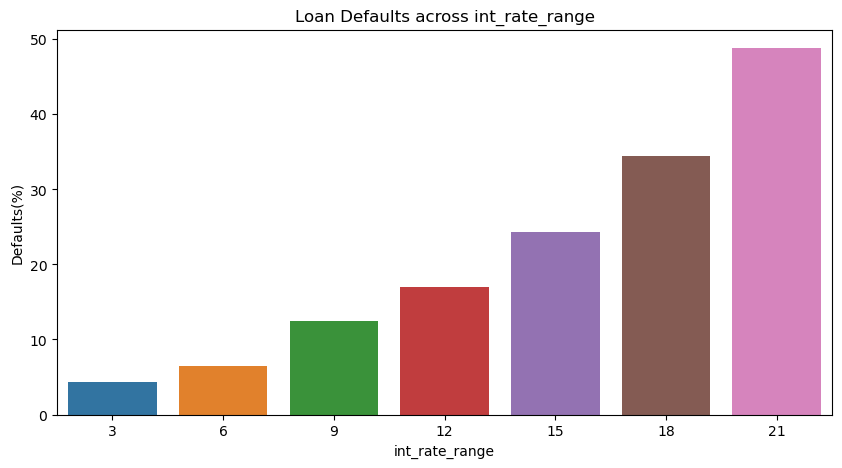

In [238]:
#plotting impact of interest rate change on default. It seems that the more the interest rate the likelyhood of default is more -Yes
plotBarChart('int_rate_range',(10,5))

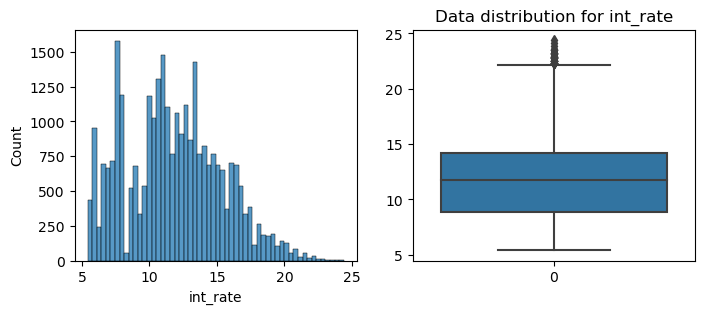

In [239]:
plotBasicSpreadChart('int_rate',(8,3))

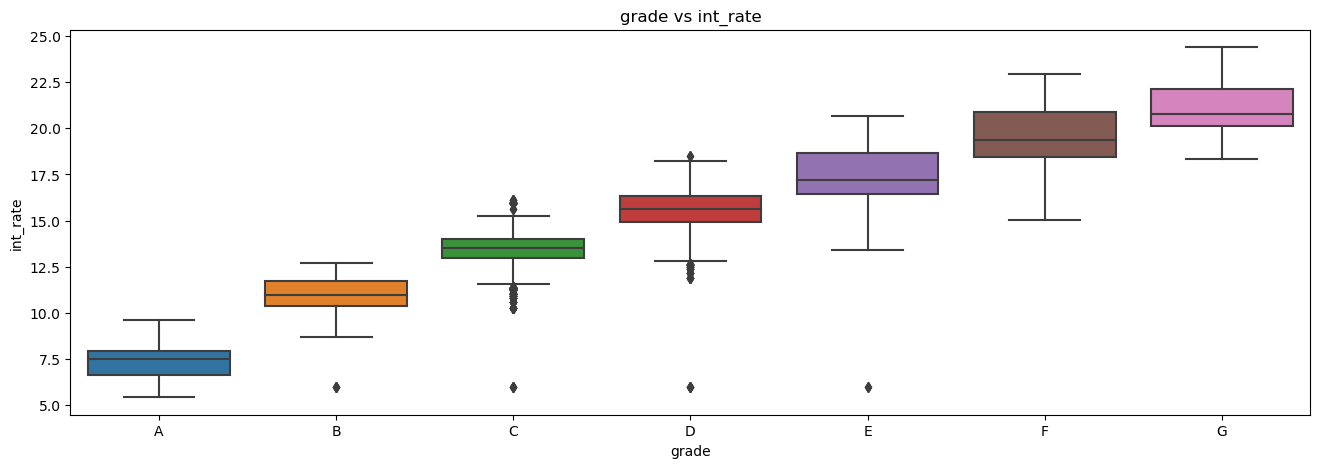

In [240]:
plotBoxChartChart('grade','int_rate',(16,5))

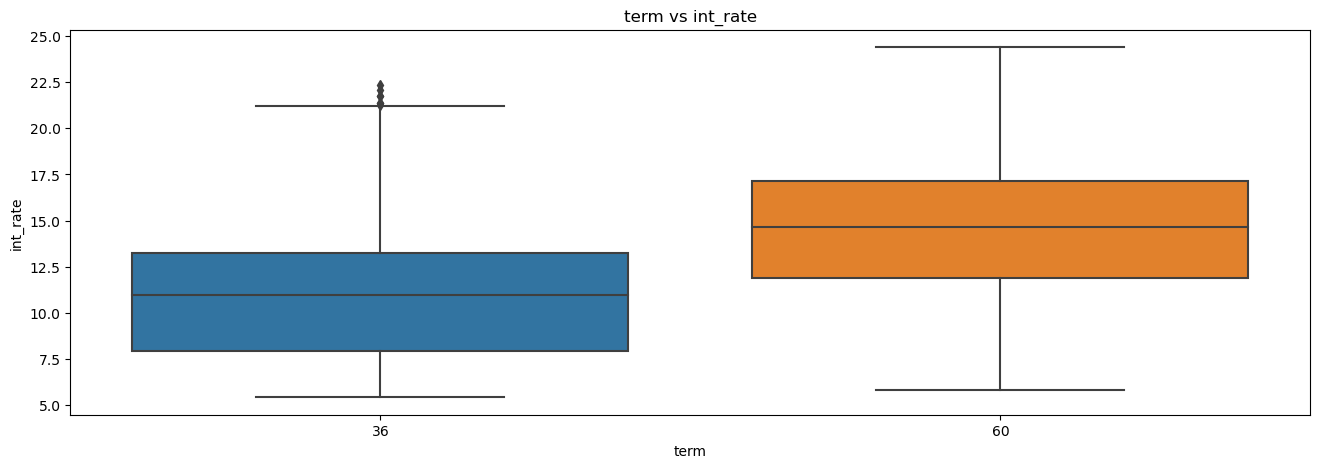

In [241]:
plotBoxChartChart('term','int_rate',(16,5))

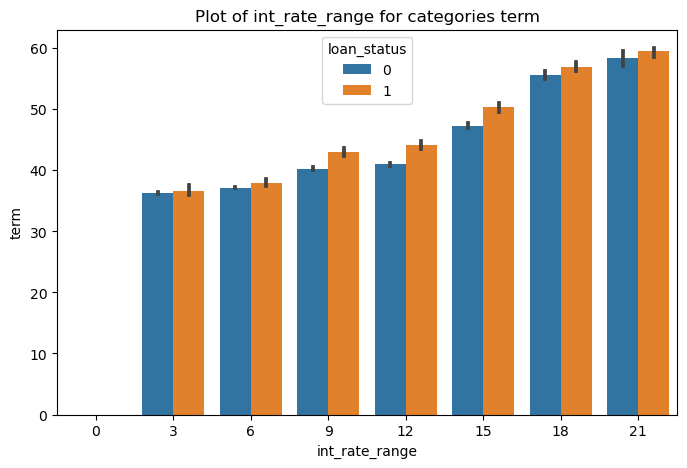

In [242]:
plotBarChartAlt('int_rate_range','term', (8,5))

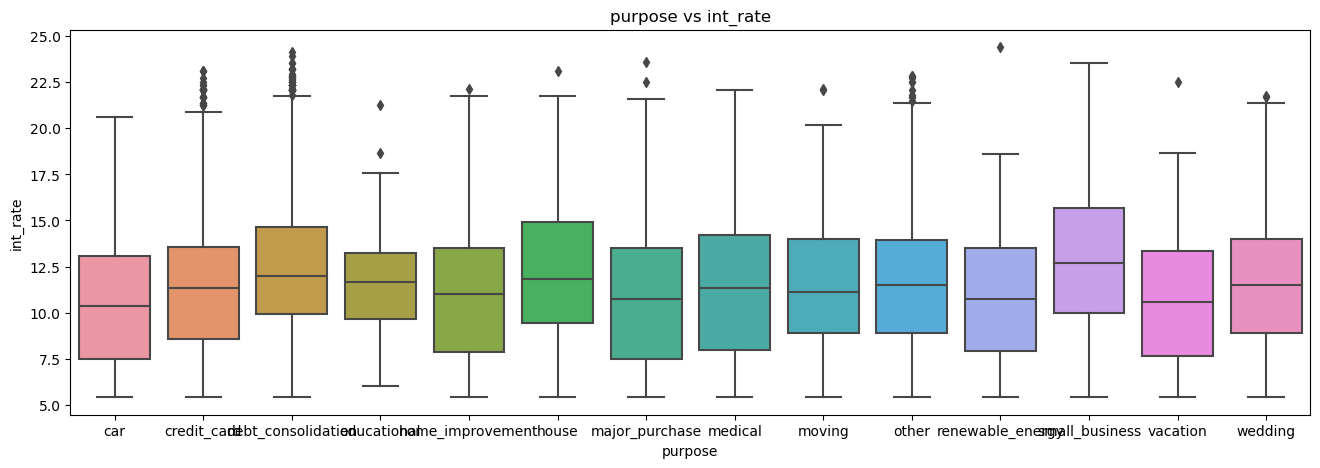

In [243]:
plotBoxChartChart('purpose','int_rate',(16,5))

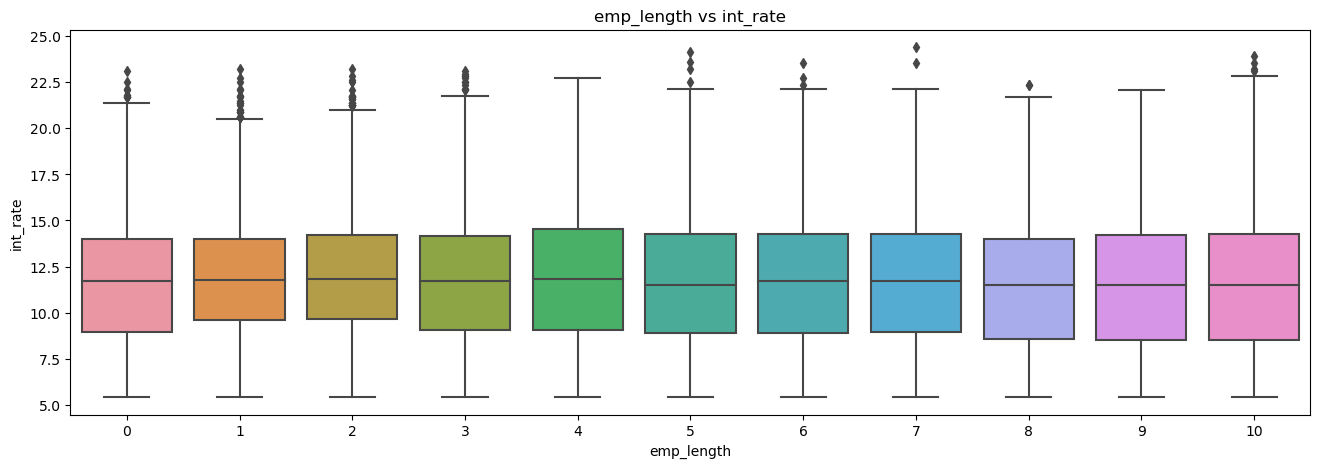

In [244]:
plotBoxChartChart('emp_length','int_rate',(16,5))

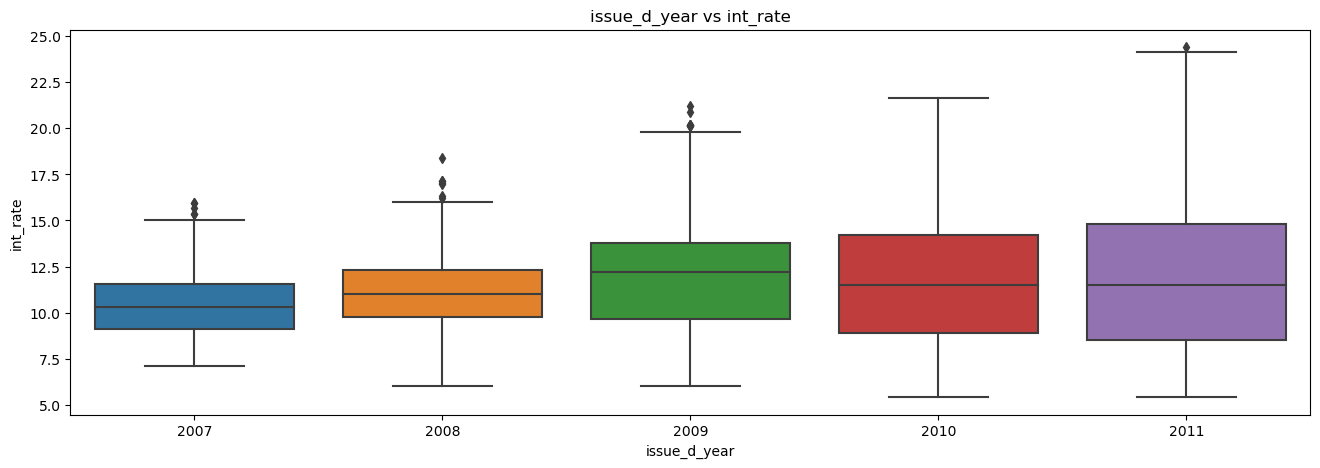

In [245]:
plotBoxChartChart('issue_d_year','int_rate',(16,5))

<Figure size 1600x500 with 0 Axes>

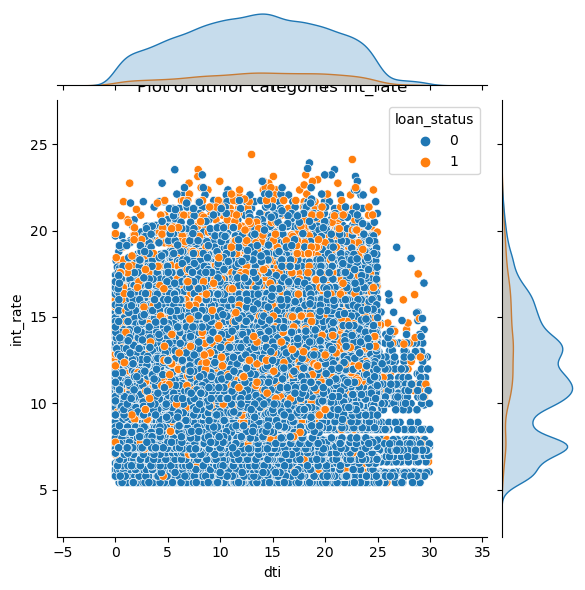

In [246]:
plotScatterPlot('dti','int_rate',(16,5))

#### Observation
From the above plots we can say that more interest rate leads to more default

From above plot lower the grade the higher is the interest they pay

Looks people pay higher interest for longer term loans

Apparently small business and debt consolidation and home are paying more loans

Employment length does not have impact on interest rate

From 2009 onwards rates were spread out

There is no coorelation between dti and interest rate

### Installment

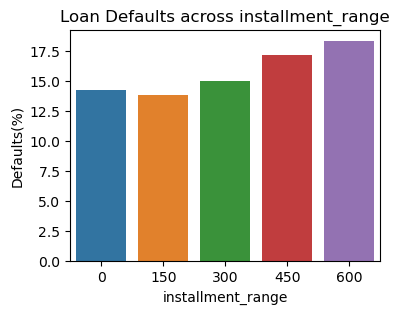

In [247]:
#plotting impact of installment rate change on default. it seems very faint relation - Yes(maybe)
plotBarChart('installment_range',(4,3))

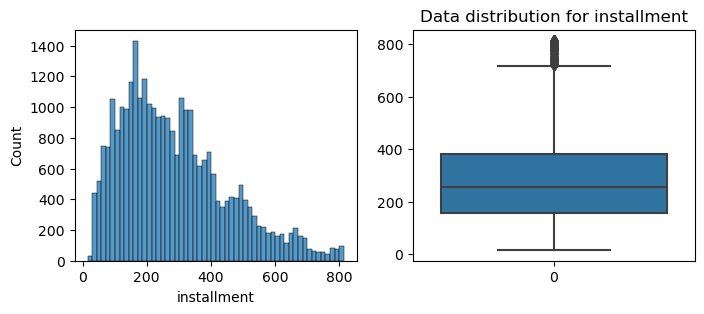

In [248]:
plotBasicSpreadChart('installment',(8,3))

#### Observation
From the above plots we cannot say anything abour default rates. It appears most people take smaller installment loann

### Revol Util

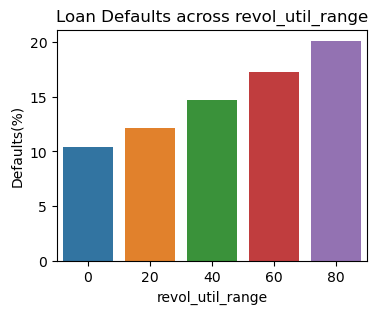

In [249]:
#plotting revol_util of change on default. it seems it has coorelation - Yes
plotBarChart('revol_util_range',(4,3))

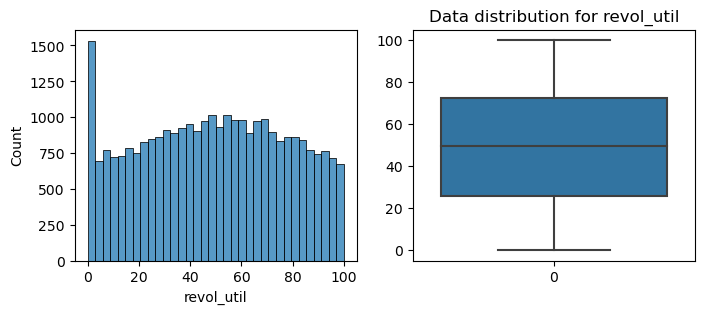

In [250]:
plotBasicSpreadChart('revol_util',(8,3))

#### Observation
From the above plots we can say people more revolving loans are 2 likely to default

### DTI

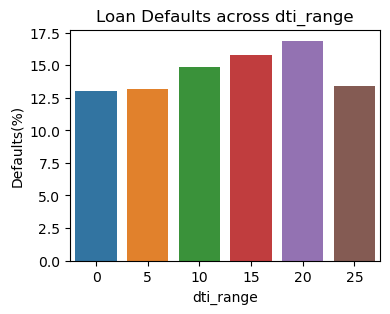

In [251]:
#plotting dri  of installment rate change on default. it seems it has coorelation it is increasing till 20-25%. - Yes(a faint relation)
plotBarChart('dti_range',(4,3))

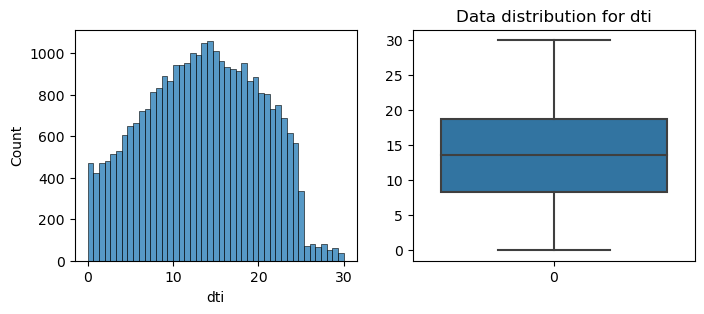

In [252]:
plotBasicSpreadChart('dti',(8,3))

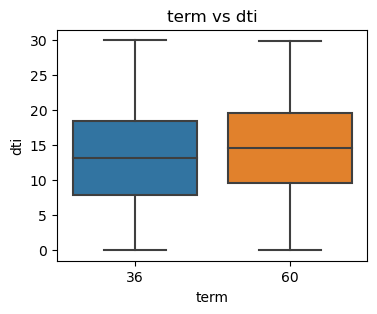

In [253]:
plotBoxChartChart('term','dti',(4,3))

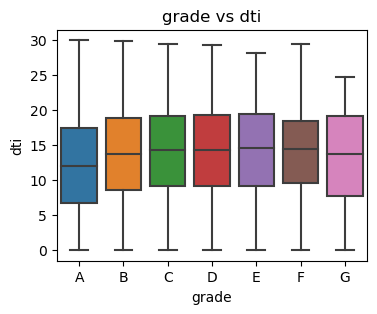

In [254]:
plotBoxChartChart('grade','dti',(4,3))

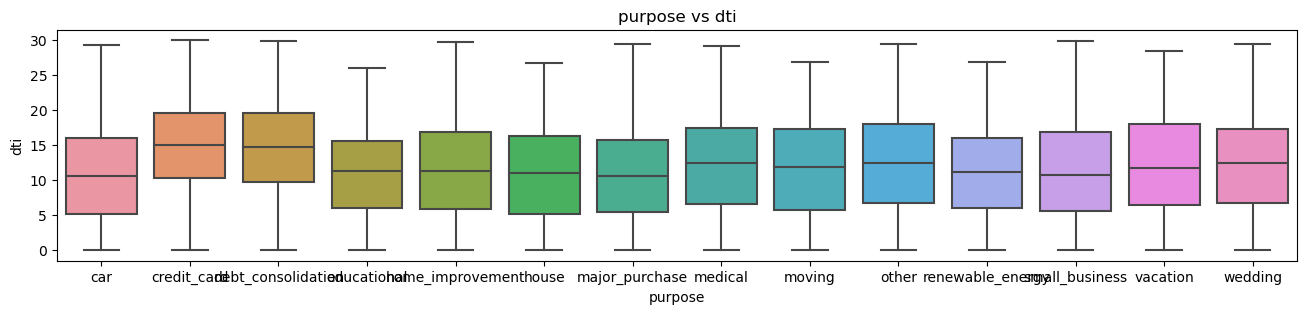

In [255]:
plotBoxChartChart('purpose','dti',(16,3))

#### Observation
From the above plots we can say that as DTI increases default also increases

DTI is on higher side for people with more tenure

DTI and Grades are nearly in line with less coorelation

Credit card and debt consolidation purpose has more DTI

C:\Users\spanbuch\AppData\Local\Temp\ipykernel_23528\494515699.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


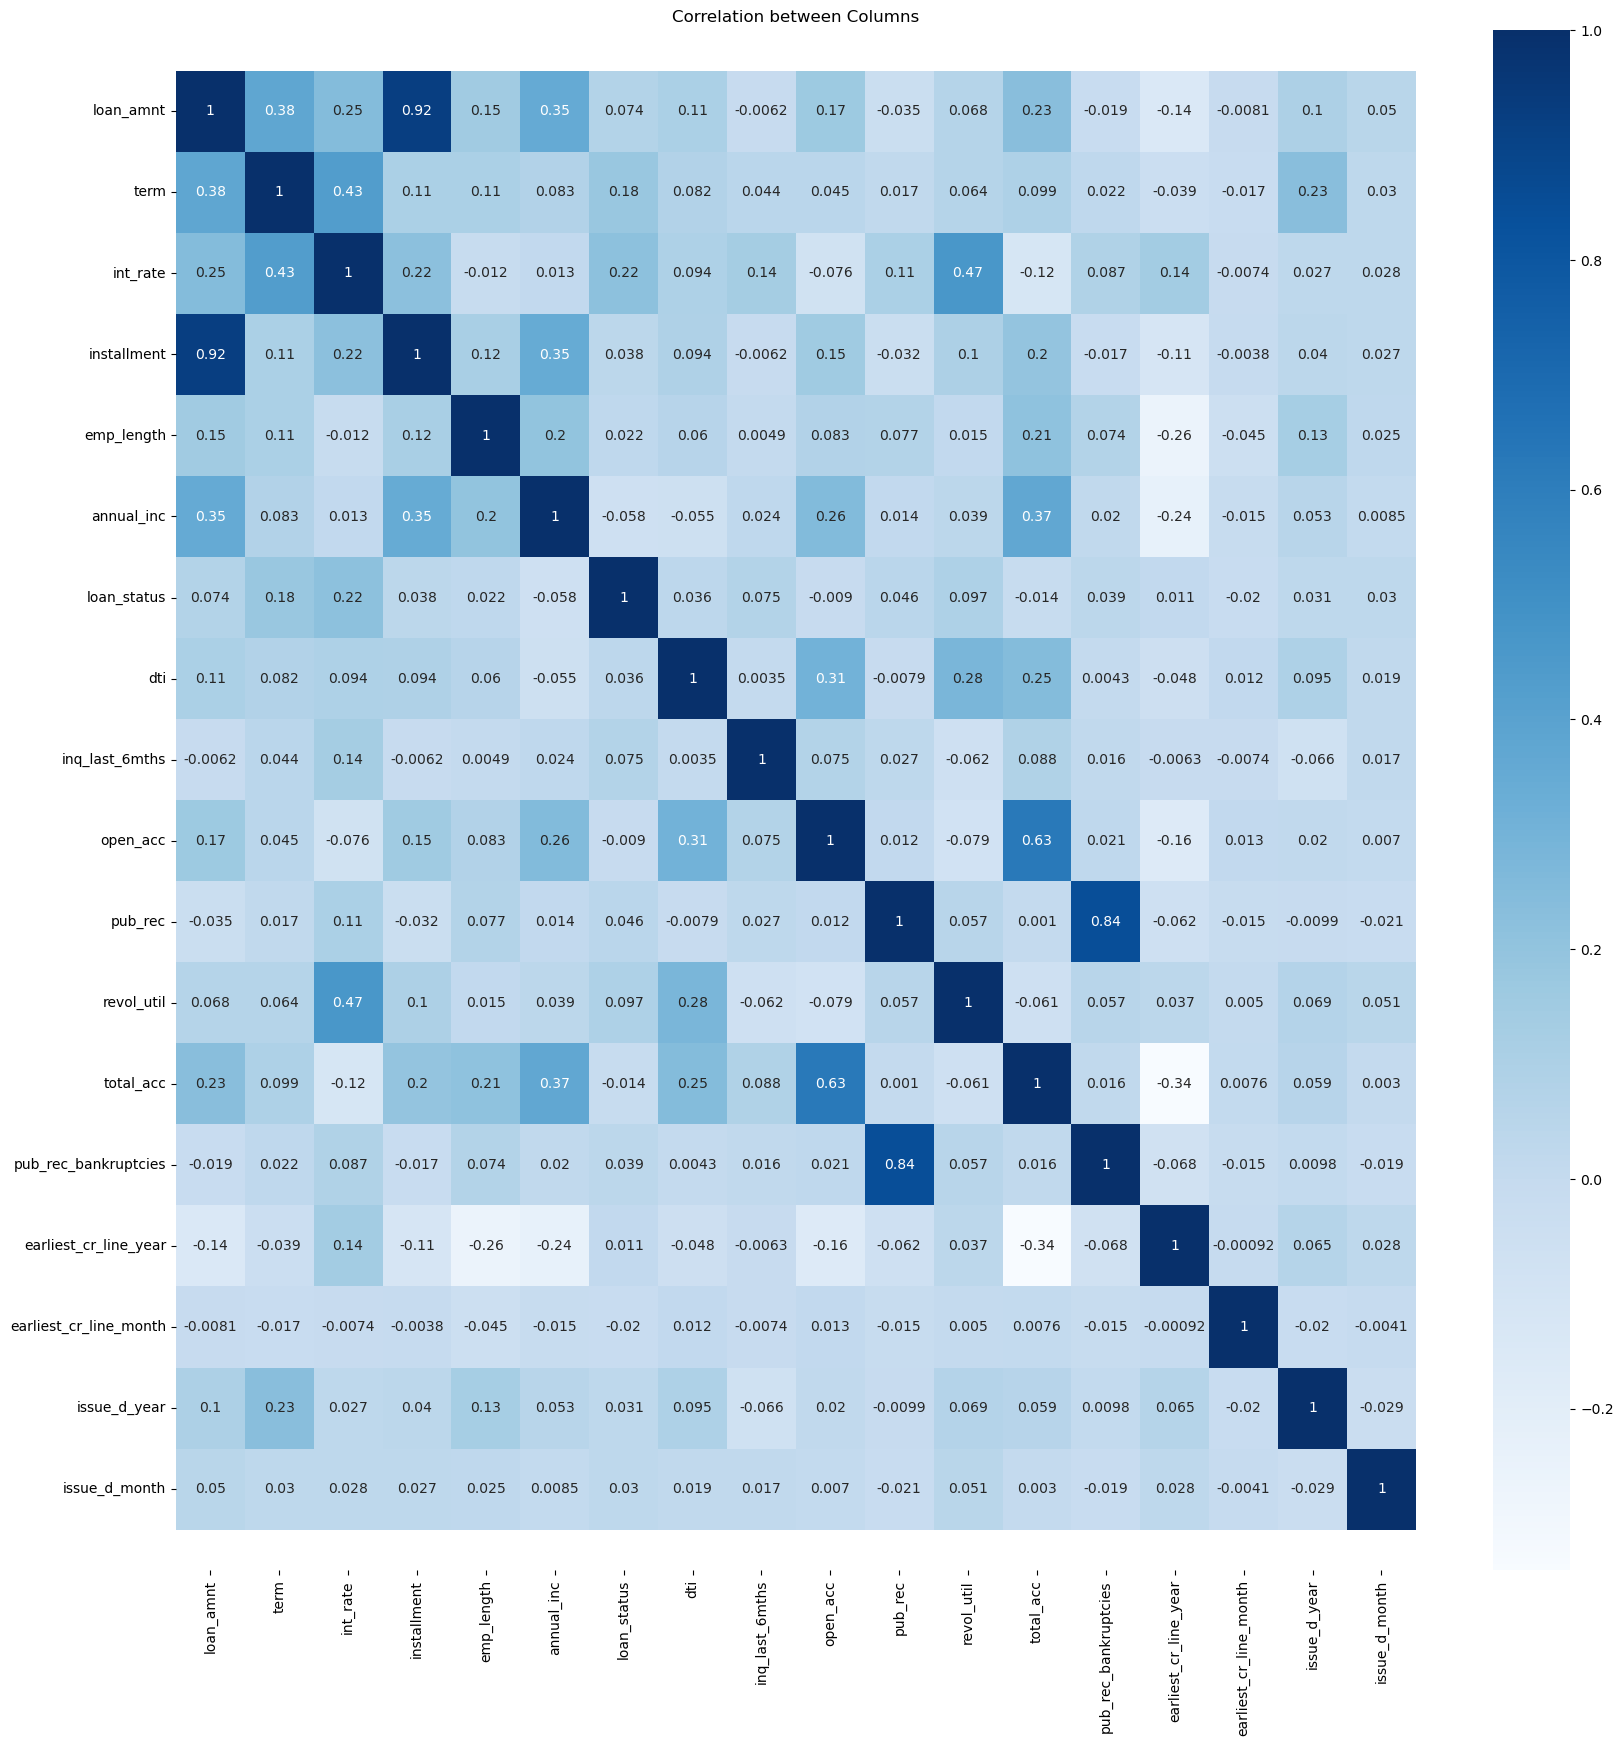

In [256]:
#Finding correlation matric
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

### Conclusion
there is  strong corelation betwen bankruptcies and public records
there is fair coorelation between total_acc and open_acc
there is strong coorelation between installment and loan_amt

# 4. Overall conclusion
1. There is a higher chance of default for loan amount(loan_amnt) gt 15000
2. Higher the term the more chances of failure
3. Lower the grade the higher the default rate
4. Lower the income the higher the default rate
5. More the int_rate the higher chances of default
6. NE state(addr_state) seems to be leading in defaults by 60% default rate. In terms of volume CA leads the pack
7. Nore than 6 enquires(inq_last_6mths) are likely to cause default
8. Bankruptcies(pub_rec_bankruptcies) has impact on default rate